# Projet 2 : Analysez des données de systèmes éducatifs

## Objectifs :
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

In [1]:
# Import des librairies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import collections

In [2]:
# Chargement des fichiers csv
country = pd.read_csv("Edstats_csv\EdStatsCountry.csv")
country_series = pd.read_csv("Edstats_csv\EdStatsCountry-Series.csv")
data = pd.read_csv("Edstats_csv\EdStatsData.csv")
foot_note = pd.read_csv("Edstats_csv\EdStatsFootNote.csv")
series = pd.read_csv("Edstats_csv\EdStatsSeries.csv")

## Jeu de données 1 : 'Country'

In [3]:
# Lignes et colonnes du 1er jeu de données
country.shape

(241, 32)

In [4]:
# Aperçu du 1er jeu de données
country.head(6)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Analyse exploratoire

- **Variables intéressantes** : Region, Income Group
- **Lignes et colonnes** : 241, 32
- **Types des variables intéressantes** : quantitatives : 7 régions, 5 classes de revenus
- **Analyse des valeurs manquantes** : 
    - 241 pays mais 242 pour l'autre dataset, manque 1 pays ?

In [5]:
# Différence entre les codes uniques des pays
set(data['Country Code'].unique()) - set(country['Country Code'].unique())

{'VGB'}

Il manque le pays dont le 'Country Code' est 'VGB' dans le dataset Country.

In [6]:
data[data['Country Code'] == 'VGB'].iloc[0,0]

'British Virgin Islands'

Il s'agit des Iles Vierges Britanniques à qui on peut attribuer la région 'Latin America & Caribbean'.

In [7]:
country1 = country.append({'Country Code' : 'VGB' , 'Country Name' : 'British Virgin Islands', 'Region' : 'Latin America & Caribbean'} , ignore_index=True)

In [8]:
country1

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31,Country Name
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN,NaN
240,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN,NaN


In [9]:
# La colonne 'Region' semble intéressante pour la suite
# Nombre de pays par région
country1['Region'].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [10]:
# Création de la liste contenant les régions
regions = list(country1['Region'].unique())
regions

['Latin America & Caribbean',
 'South Asia',
 'Sub-Saharan Africa',
 'Europe & Central Asia',
 nan,
 'Middle East & North Africa',
 'East Asia & Pacific',
 'North America']

In [11]:
# Vérification de la présence de valeurs manquantes pour la colonne 'Region'
country1[country1['Region'] == regions[4]]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31,Country Name


In [12]:
del regions[4]

In [13]:
regions

['Latin America & Caribbean',
 'South Asia',
 'Sub-Saharan Africa',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'East Asia & Pacific',
 'North America']

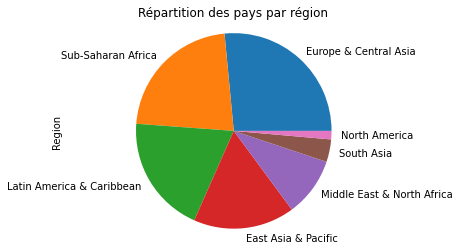

In [14]:
# Répartition des pays par région
country1['Region'].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal')
plt.title('Répartition des pays par région')
nom = str('Répartition des pays par région')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

In [15]:
# Autre colonne intéressante : les classes de revenus
# Affichage des différentes classes
country1['Income Group'].value_counts()

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

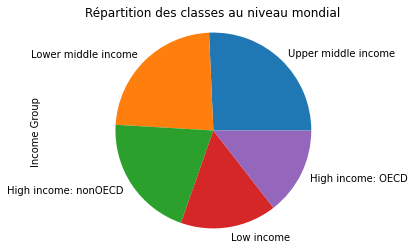

In [16]:
# Répartition des classes au niveau mondial
country1['Income Group'].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal')
plt.title('Répartition des classes au niveau mondial')
nom = str('Répartition des classes au niveau mondial')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

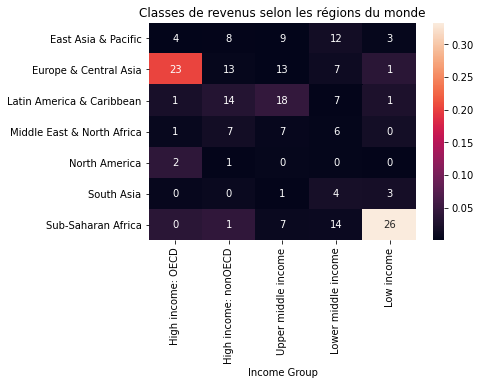

In [17]:
# Tableau de contingence pour représenter les classes de revenus selon les régions du monde

# Pour les lignes du tableau, les régions
X = 'Region'
# Pour les colonnes, les classes de revenus
Y = 'Income Group'

# Création d'un tableau croisé dynamique
column_order = ["High income: OECD", "High income: nonOECD", "Upper middle income", "Lower middle income", "Low income"]
c = country1[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len).reindex(column_order, axis=1)
cont = c.copy()

# Aggrégation des valeurs
tx = country1[X].value_counts()
ty = country1[Y].value_counts().reindex(column_order, axis=1)

# Transformation en Dataframe pandas
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(country)
indep = tx.dot(ty.T) / n

c = c.fillna(0) # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n,annot=c)


plt.title('Classes de revenus selon les régions du monde')
nom = str('Classes de revenus selon les régions du monde')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

On s'aperçoit ici que ce tableau serait plus représentatif en identifiant les classes de revenus en pourcentage de pays par région

In [18]:
# Répartition en pourcentage des classes de revenus des pays par région
d = c.apply(lambda x: np.around(100 * x/x.sum(), decimals = 1), axis=1)
d

Income Group,High income: OECD,High income: nonOECD,Upper middle income,Lower middle income,Low income
Region,,,,,
East Asia & Pacific,11.1,22.2,25.0,33.3,8.3
Europe & Central Asia,40.4,22.8,22.8,12.3,1.8
Latin America & Caribbean,2.4,34.1,43.9,17.1,2.4
Middle East & North Africa,4.8,33.3,33.3,28.6,0.0
North America,66.7,33.3,0.0,0.0,0.0
South Asia,0.0,0.0,12.5,50.0,37.5
Sub-Saharan Africa,0.0,2.1,14.6,29.2,54.2


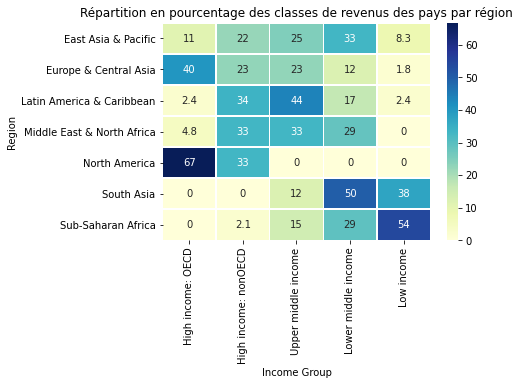

In [19]:
# Heatmap de cette répartition
ax = sns.heatmap(d, cmap="YlGnBu", linewidths=.5, annot=True)

plt.title('Répartition en pourcentage des classes de revenus des pays par région')
nom = str('Répartition en pourcentage des classes de revenus des pays par région')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

# Jeu de données 2 : 'Country series'

In [20]:
# Lignes et colonnes du 2ème jeu de données
country_series.shape

(613, 4)

In [21]:
# Aperçu du 2ème jeu de données
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


## 2. Analyse exploratoire

- **Variables intéressantes** : aucune
- **Lignes et colonnes** : 613, 4
   
### Ce jeu de données ne fournit pas de données intéressantes pour répondre à la problématique du projet

# Jeu de données 3 : 'Data'

In [22]:
df = data.copy()

In [23]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Lignes et colonnes du 3ème jeu de données
df.shape

(886930, 70)

In [25]:
# Colonnes du 3ème jeu de données
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

## 3. Analyse exploratoire


#### Analyse de Forme :

- **Variables intéressantes** : Indicator Code, les années 2000 à 2017 pour répondre à la problématique
- **Lignes et colonnes** : 886930, 70 : qui correspond bien à 3665 x 242 lignes (indicateurs x pays)
- **Types de variables** : qualitatives : 4, quantitatives : 66
- **Analyse des valeurs manquantes** : 
    - beaucoup de NaN
    - 2 groupes de données : 94% -> Projection, < 90% -> Données enregistrées exploitables

#### Analyse de Fond :
- **Visualisation pour l'Indicator Code** : 3665 indicateurs pour 242 pays
- **Sélection des indicateurs et signification** : pré-choix de 8 indicateurs
>    - •	<span style="color:red">03 Secondary</span> : Enrolment in upper secondary education, both sexes (number) : **UIS.E.3** *(lycée)*
>    - •	<span style="color:red">04 Vocational & Post-secondary Non-Tertiary</span> :  Enrolment in post-secondary non-tertiary education, both sexes (number) : **UIS.E.4** *(études supérieures sans bac)*
>    - •	<span style="color:red">5 Tertiary</span> : Enrolment in tertiary education, all programmes, both sexes (number) : **SE.TER.ENRL** *(enseignement supérieur incluant les universités)*
>    - •	<span style="color:red">12 Population</span> :
        - Population, ages 15-24, total : **SP.POP.1524.TO.UN** *(Population des 15-24 ans)*
        - Population, total : **SP.POP.TOTL** *(Population totale)*
>    - •	<span style="color:red">14 Background</span> :
        - GDP per capita (current US$) **NY.GDP.PCAP.CD** *(PIB par habitant)*
        - Internet users (per 100 people) : **IT.NET.USER.P2** *(% personnes utilisant internet)*
        - Personal computers (per 100 people) : **IT.CMP.PCMP.P2** *(% de personnes possédant un ordinateur)*

In [26]:
df.dtypes.value_counts()

float64    66
object      4
dtype: int64

In [27]:
missing_rate = df.isna().sum()/df.shape[0]

In [28]:
# Affichage du taux de valeurs manquantes de toutes les colonnes dans l'ordre croissant
pd.set_option('display.max_row', len(missing_rate))
missing_rate.sort_values(ascending=True)

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.726650
2005              0.792421
2000              0.800801
2012              0.833962
2011              0.835374
2009              0.839775
2006              0.841800
2013              0.844961
2007              0.845228
2008              0.848481
1995              0.851892
2015              0.852234
2003              0.853018
2004              0.854764
1990              0.859735
2002              0.859961
2001              0.860745
1999              0.866011
2014              0.871705
1985              0.898193
1980              0.899516
1975              0.901564
1998              0.904261
1994              0.912663
1996              0.913401
1993              0.914545
1992              0.914826
1991              0.916073
1997              0.917183
1970              0.918496
2040              0.942007
2025              0.942007
2090              0.942007
2

Beaucoup de valeurs manquantes : 94% pour les années 2020 à 2100 (il s'agit probablement de projections).
Au-dessus de ce taux, inutile de prendre les années en compte, i.e. les années 2016 et 2017 de notre premier choix.
L'étude portera donc sur les années 2000 à 2015 inclus pour le moment.

In [29]:
# Choix des colonnes pertinentes : les 4 premières colonnes
ind = []
for i in range(0, 4, 1):
    ind = ind + [str(data.columns.values[i])] #transformation en liste du nom des premières colonnes
    
# Choix des colonnes correspondant aux années que l'on souhaite garder pour l'étude : de 2000 à 2015 inclus
year= []
for i in range(2000, 2016, 1):
    year = year + [''+ str(i) +''] #création d'une liste des années choisies dans le même format

In [30]:
# Vérification de la première liste
ind

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

In [31]:
# Vérification de la 2ème liste
year

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [32]:
# Fusion des listes
colonnes = ind + year
colonnes

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [33]:
# Projection du jeu de données pour ne garder que les colonnes que l'on souhaite étudier
df = df.loc[:,colonnes] #en conservant toutes les lignes pour le moment

In [34]:
# Aperçu de cette projection
df.describe(include='all')

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,886930,886930,886930,886930,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,East Asia & Pacific (excluding high income),LCN,LLECE: 3rd grade students by mathematics profi...,BAR.POP.4044.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10
std,NaN,NaN,NaN,NaN,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11
min,NaN,NaN,NaN,NaN,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00
25%,NaN,NaN,NaN,NaN,5.699035e+00,1.599897e+01,1.584246e+01,1.550983e+01,1.418687e+01,5.720000e+00,1.277624e+01,1.268661e+01,1.233467e+01,1.181939e+01,1.322703e+00,1.216330e+01,1.100000e+01,1.306113e+01,1.614639e+01,4.100000e-01
50%,NaN,NaN,NaN,NaN,5.078717e+01,8.300000e+02,9.460000e+02,3.956150e+02,3.350000e+02,5.031512e+01,9.981849e+01,1.000000e+02,1.000000e+02,9.925039e+01,2.046020e+01,9.853510e+01,9.759012e+01,1.000000e+02,1.000000e+02,5.235000e+01
75%,NaN,NaN,NaN,NaN,3.343950e+04,1.746540e+05,1.770990e+05,1.474790e+05,1.584082e+05,2.993150e+04,1.187198e+05,1.343790e+05,1.453855e+05,1.180412e+05,3.121000e+03,1.065065e+05,1.038168e+05,1.426480e+05,1.636440e+05,6.153575e+04


### Pré-choix de 8 indicateurs
>    - •	<span style="color:red">03 Secondary</span> :
        - **UIS.E.3** *(Inscriptions en lycée)*
>    - •	<span style="color:red">04 Vocational & Post-secondary Non-Tertiary</span> : 
        - **UIS.E.4** *(Inscriptions à l’université ou dans des filières post-bac)*
>    - •	<span style="color:red">5 Tertiary</span> : 
        - **SE.TER.ENRL** *(Inscriptions dans l'enseignement supérieur)*
>    - •	<span style="color:red">12 Population</span> :
        - **SP.POP.1524.TO.UN** *(Population des 15-24 ans)*
        - **SP.POP.TOTL** *(Population totale)*
>    - •	<span style="color:red">14 Background</span> :
        - **NY.GDP.PCAP.CD** *(PIB par habitant)*
        - **IT.NET.USER.P2** *(% personnes utilisant internet)*
        - **IT.CMP.PCMP.P2** *(% de personnes possédant un ordinateur)*

In [35]:
# Liste d'indicateurs
indicators = [str('UIS.E.3'), str('UIS.E.4'), str('SE.TER.ENRL'), str('SP.POP.1524.TO.UN'), str('SP.POP.TOTL'), str('NY.GDP.PCAP.CD'), str('IT.NET.USER.P2'), str('IT.CMP.PCMP.P2')]
indicateur = ['Inscriptions en lycée', 'Inscriptions à l’université ou dans des filières post-bac', 'Inscriptions dans l\'enseignement supérieur', 'Population des 15-24 ans', 'Population totale', 'PIB par habitant', '% personnes utilisant internet', '% de personnes possédant un ordinateur']
indicateurs = {indicators[i] : indicateur[i] for i in range(len(indicators))}
indicateurs

{'UIS.E.3': 'Inscriptions en lycée',
 'UIS.E.4': 'Inscriptions à l’université ou dans des filières post-bac',
 'SE.TER.ENRL': "Inscriptions dans l'enseignement supérieur",
 'SP.POP.1524.TO.UN': 'Population des 15-24 ans',
 'SP.POP.TOTL': 'Population totale',
 'NY.GDP.PCAP.CD': 'PIB par habitant',
 'IT.NET.USER.P2': '% personnes utilisant internet',
 'IT.CMP.PCMP.P2': '% de personnes possédant un ordinateur'}

In [36]:
# Filtre pour ne garder ques les lignes correspondant aux indicateurs choisis
df = df[df['Indicator Code'].isin(indicators)]

In [37]:
# Aperçu du filtre
df.describe(include='all')

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,1936,1936,1936,1936,1.495000e+03,1.519000e+03,1.526000e+03,1.517000e+03,1.529000e+03,1.515000e+03,1.420000e+03,1.363000e+03,1.340000e+03,1.315000e+03,1.310000e+03,1.320000e+03,1.313000e+03,1.300000e+03,1.235000e+03,9.790000e+02
unique,242,242,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Europe & Central Asia (excluding high income),GHA,"Population, ages 15-24, total",UIS.E.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,8,242,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.944117e+07,2.939252e+07,2.969543e+07,3.032149e+07,3.050275e+07,3.121694e+07,3.379469e+07,3.571082e+07,3.684336e+07,3.805223e+07,3.870344e+07,3.893712e+07,3.964521e+07,4.056535e+07,4.139689e+07,5.055730e+07
std,NaN,NaN,NaN,NaN,2.745922e+08,2.760131e+08,2.789293e+08,2.833080e+08,2.857694e+08,2.906685e+08,3.038532e+08,3.138771e+08,3.204208e+08,3.273670e+08,3.319643e+08,3.346816e+08,3.395997e+08,3.453731e+08,3.563955e+08,4.043855e+08
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e-01,9.900000e-01,1.083733e+00
25%,NaN,NaN,NaN,NaN,3.633682e+01,3.447262e+01,3.706363e+01,4.575790e+01,5.289000e+01,5.698077e+01,2.977953e+02,1.015738e+03,1.303132e+03,1.820416e+03,2.324080e+03,2.521957e+03,2.327000e+03,2.362221e+03,1.992559e+03,6.921967e+02
50%,NaN,NaN,NaN,NaN,2.241500e+04,2.067066e+04,2.256918e+04,2.660244e+04,2.878900e+04,3.117800e+04,4.837550e+04,7.315332e+04,9.029800e+04,1.014530e+05,1.017895e+05,1.045330e+05,1.053450e+05,1.151700e+05,1.130900e+05,6.213967e+04
75%,NaN,NaN,NaN,NaN,1.204690e+06,1.125556e+06,1.109283e+06,1.171767e+06,1.199500e+06,1.266518e+06,1.589258e+06,1.915865e+06,2.089232e+06,2.264485e+06,2.288958e+06,2.233682e+06,2.296306e+06,2.463935e+06,2.800523e+06,2.691189e+06


In [38]:
# Mise à jour du taux de valeurs manquantes
missing_rate = df.isna().sum()/df.shape[0]

In [39]:
missing_rate

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2000              0.227789
2001              0.215393
2002              0.211777
2003              0.216426
2004              0.210227
2005              0.217459
2006              0.266529
2007              0.295971
2008              0.307851
2009              0.320764
2010              0.323347
2011              0.318182
2012              0.321798
2013              0.328512
2014              0.362087
2015              0.494318
dtype: float64

In [40]:
# Suppression des premières lignes pour voir uniquement le taux de remplissage par année
missing_rate = missing_rate.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']).reset_index(drop=True) #reindexage pour pouvoir représenter graphiquement plus tard
missing_rate

0     0.227789
1     0.215393
2     0.211777
3     0.216426
4     0.210227
5     0.217459
6     0.266529
7     0.295971
8     0.307851
9     0.320764
10    0.323347
11    0.318182
12    0.321798
13    0.328512
14    0.362087
15    0.494318
dtype: float64

In [41]:
# Taux de remplissage de données
remplissage = pd.DataFrame({'Année' : year, 'Taux' : np.round((100*(1-missing_rate)), decimals = 1)})
remplissage

,Année,Taux
0,2000,77.2
1,2001,78.5
2,2002,78.8
3,2003,78.4
4,2004,79.0
5,2005,78.3
6,2006,73.3
7,2007,70.4
8,2008,69.2
9,2009,67.9


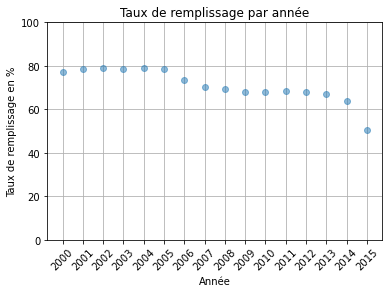

In [42]:
# Représentation graphique du taux de remplissage par année
plt.plot(remplissage["Année"],remplissage["Taux"],'o',alpha=0.5)
plt.xlabel("Année")
plt.xticks(rotation= 45)
plt.ylabel("Taux de remplissage en %")
plt.ylim(0, 100)
plt.grid()
plt.title('Taux de remplissage par année')
nom = str('Taux de remplissage par année')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

Le taux de remplissage est à première vue acceptable pour les années sélectionnées.

In [43]:
# Ajout de la colonne région au dataset
region = country1.loc[: , ['Country Code', 'Region']]

In [44]:
pays_sans_region = country1[country1['Region'].isna() == True]['Short Name']
pays_sans_region

5                                          Arab World
57              East Asia & Pacific (developing only)
58            East Asia & Pacific (all income levels)
59            Europe & Central Asia (developing only)
60          Europe & Central Asia (all income levels)
63                                          Euro area
68                                     European Union
78                                          Gibraltar
89                                        High income
92             Heavily indebted poor countries (HIPC)
116       Latin America & Caribbean (developing only)
122     Latin America & Caribbean (all income levels)
123      Least developed countries: UN classification
124                                        Low income
127                               Lower middle income
128                               Low & middle income
140    Middle East & North Africa (all income levels)
143                                     Middle income
148      Middle East & North

On note ici qu'il y a certaines lignes qui correspondent à une classification : exemple, l'ensemble des pays de l'Union Européenne, ou l'ensemble des pays riches ou même l'ensemble de tous les pays.

In [45]:
# Jointure
df = pd.merge(region, df)
df.head()

,Country Code,Region,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ABW,Latin America & Caribbean,Aruba,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,124.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Latin America & Caribbean,Aruba,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1578.000000,1628.000000,1592.000000,1672.000000,1704.000000,...,2094.000000,2232.000000,2242.00000,2196.00000,2330.000000,2504.000000,2621.0,1181.0,1235.00,1166.000000
2,ABW,Latin America & Caribbean,Aruba,"Enrolment in upper secondary education, both s...",UIS.E.3,3119.000000,3318.000000,3525.000000,3655.000000,3632.000000,...,3883.000000,4430.000000,4060.00000,3976.00000,3913.000000,3970.000000,4841.0,NaN,NaN,NaN
3,ABW,Latin America & Caribbean,Aruba,GDP per capita (current US$),NY.GDP.PCAP.CD,20620.700626,20670.655664,20434.299436,20834.510199,22567.824925,...,24014.944267,25921.026052,27546.89939,24631.43486,24271.940421,25324.720362,NaN,NaN,NaN,NaN
4,ABW,Latin America & Caribbean,Aruba,Internet users (per 100 people),IT.NET.USER.P2,15.442823,17.100000,18.800000,20.800000,23.000000,...,28.000000,30.900000,52.00000,58.00000,62.000000,69.000000,74.0,78.9,83.78,88.661227


Regardons à quel point les indicateurs sont renseignés pour tous les pays sur la période d'étude.

In [46]:
indicateurs_rens = df.groupby(['Country Name']).count()
indicateurs_rens

,Country Code,Region,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,
Afghanistan,8,8,8,8,2,5,4,7,6,6,6,5,6,7,6,7,6,6,7,4
Albania,8,8,8,8,7,7,7,7,7,7,7,7,7,6,6,6,6,7,7,5
Algeria,8,8,8,8,6,7,7,7,7,7,6,6,5,6,6,6,5,5,5,5
American Samoa,8,8,8,8,1,1,2,2,2,2,2,3,2,2,2,2,2,2,2,2
Andorra,8,8,8,8,4,3,6,6,6,6,7,5,6,5,5,4,5,6,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,8,8,8,8,6,7,7,7,7,7,6,6,6,6,6,6,6,7,7,5
World,8,0,8,8,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,4
"Yemen, Rep.",8,8,8,8,5,7,6,7,8,8,6,5,6,5,6,6,5,5,4,4


In [47]:
# Calcul du taux de données renseignées pour tous les indicateurs sur la période donnée
taux = np.around(indicateurs_rens[year].sum(axis = 1)*100/(len(indicators)*len(year)), decimals=1)
taux

Country Name
Afghanistan           70.3
Albania               82.8
Algeria               75.0
American Samoa        24.2
Andorra               65.6
                      ... 
West Bank and Gaza    79.7
World                 78.9
Yemen, Rep.           72.7
Zambia                56.2
Zimbabwe              68.0
Length: 242, dtype: float64

In [48]:
#Création d'une fonction qui va générer un graphique du nombre de pays concernés en fonction du taux d'indicateurs renseignés
def g(x):
    return(len(df['Country Code'].unique())-len(list(taux[taux<x].index)))
   
def graphe(f,a,b,N):
    lx = [a+i*(b-a)/N for i in range(N+1)]
    ly = [f(x) for x in lx]
    plt.bar(lx,ly, width = 2)
    plt.xlabel('Taux d\'indicateurs renseignés', fontsize = 16, labelpad = 20)
    plt.ylabel('Nombre de pays concernés', fontsize = 16, labelpad = 20)
    plt.title('Nombre de pays concernés en fonction du taux d\'indicateurs renseignés')
    nom = str('Nombre de pays concernés en fonction du taux d\'indicateurs renseignés')
    plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
    plt.show() 

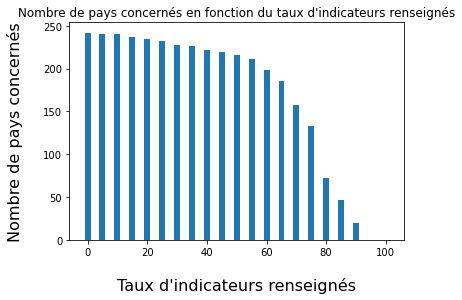

In [49]:
#Choix du pas = 20 => calcul tous les 5%
graphe(g,0,100,20)

In [50]:
# Nombre de pays ayant toutes les données renseignées
len(list(taux[taux==100].index))

0

Aucun pays n'a toutes les données renseignées.

In [51]:
df.groupby(['Region']).count()

,Country Code,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Region,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,288,288,288,288,206,212,216,212,206,202,193,184,180,181,175,172,173,172,166,142
Europe & Central Asia,456,456,456,456,367,369,373,375,379,378,376,355,351,339,340,339,339,333,324,254
Latin America & Caribbean,336,336,336,336,239,238,246,237,250,238,206,215,212,209,210,203,201,200,187,160
Middle East & North Africa,168,168,168,168,139,144,145,149,148,147,139,134,128,122,119,125,117,124,117,99
North America,24,24,24,24,21,19,18,17,19,19,19,16,16,16,17,17,17,17,15,12
South Asia,64,64,64,64,47,52,49,54,50,52,51,49,48,47,48,51,48,50,45,37
Sub-Saharan Africa,384,384,384,384,296,305,302,297,300,302,266,255,251,247,249,261,265,253,240,202


In [52]:
# Regroupement du nombre de valeurs par région
region_values = df.groupby('Region').count()
region_values[:10]

,Country Code,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Region,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,288,288,288,288,206,212,216,212,206,202,193,184,180,181,175,172,173,172,166,142
Europe & Central Asia,456,456,456,456,367,369,373,375,379,378,376,355,351,339,340,339,339,333,324,254
Latin America & Caribbean,336,336,336,336,239,238,246,237,250,238,206,215,212,209,210,203,201,200,187,160
Middle East & North Africa,168,168,168,168,139,144,145,149,148,147,139,134,128,122,119,125,117,124,117,99
North America,24,24,24,24,21,19,18,17,19,19,19,16,16,16,17,17,17,17,15,12
South Asia,64,64,64,64,47,52,49,54,50,52,51,49,48,47,48,51,48,50,45,37
Sub-Saharan Africa,384,384,384,384,296,305,302,297,300,302,266,255,251,247,249,261,265,253,240,202


In [53]:
# Ajout d'une colonne pour compter le nombre de données récupérées par région sur les années étudiées
region_values['Nombre de données'] = region_values[year].sum(axis=1)

In [54]:
region_values

,Country Code,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Nombre de données
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,288,288,288,288,206,212,216,212,206,202,...,184,180,181,175,172,173,172,166,142,2992
Europe & Central Asia,456,456,456,456,367,369,373,375,379,378,...,355,351,339,340,339,339,333,324,254,5591
Latin America & Caribbean,336,336,336,336,239,238,246,237,250,238,...,215,212,209,210,203,201,200,187,160,3451
Middle East & North Africa,168,168,168,168,139,144,145,149,148,147,...,134,128,122,119,125,117,124,117,99,2096
North America,24,24,24,24,21,19,18,17,19,19,...,16,16,16,17,17,17,17,15,12,275
South Asia,64,64,64,64,47,52,49,54,50,52,...,49,48,47,48,51,48,50,45,37,778
Sub-Saharan Africa,384,384,384,384,296,305,302,297,300,302,...,255,251,247,249,261,265,253,240,202,4291


In [55]:
# Tri par ordre croissant du nombre de données
region_values = region_values.sort_values(by=['Nombre de données'])

In [56]:
# Affichage du nombre de données par région
region_values.iloc[:,[-1]]

,Nombre de données
Region,
North America,275
South Asia,778
Middle East & North Africa,2096
East Asia & Pacific,2992
Latin America & Caribbean,3451
Sub-Saharan Africa,4291
Europe & Central Asia,5591


In [57]:
# Ajout de l'élément 'Indicator Code' dans notre liste de colonnes
year.append('Indicator Code')
tableau = region_values[year]
tableau

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Indicator Code
Region,,,,,,,,,,,,,,,,,
North America,21,19,18,17,19,19,19,16,16,16,17,17,17,17,15,12,24
South Asia,47,52,49,54,50,52,51,49,48,47,48,51,48,50,45,37,64
Middle East & North Africa,139,144,145,149,148,147,139,134,128,122,119,125,117,124,117,99,168
East Asia & Pacific,206,212,216,212,206,202,193,184,180,181,175,172,173,172,166,142,288
Latin America & Caribbean,239,238,246,237,250,238,206,215,212,209,210,203,201,200,187,160,336
Sub-Saharan Africa,296,305,302,297,300,302,266,255,251,247,249,261,265,253,240,202,384
Europe & Central Asia,367,369,373,375,379,378,376,355,351,339,340,339,339,333,324,254,456


In [58]:
# Tableau de contingence du taux de remplissage selon les années et les régions
tab = tableau.apply(lambda x: np.around(100 * x/x['Indicator Code'], decimals = 1), axis=1)
tab

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Indicator Code
Region,,,,,,,,,,,,,,,,,
North America,87.5,79.2,75.0,70.8,79.2,79.2,79.2,66.7,66.7,66.7,70.8,70.8,70.8,70.8,62.5,50.0,100.0
South Asia,73.4,81.2,76.6,84.4,78.1,81.2,79.7,76.6,75.0,73.4,75.0,79.7,75.0,78.1,70.3,57.8,100.0
Middle East & North Africa,82.7,85.7,86.3,88.7,88.1,87.5,82.7,79.8,76.2,72.6,70.8,74.4,69.6,73.8,69.6,58.9,100.0
East Asia & Pacific,71.5,73.6,75.0,73.6,71.5,70.1,67.0,63.9,62.5,62.8,60.8,59.7,60.1,59.7,57.6,49.3,100.0
Latin America & Caribbean,71.1,70.8,73.2,70.5,74.4,70.8,61.3,64.0,63.1,62.2,62.5,60.4,59.8,59.5,55.7,47.6,100.0
Sub-Saharan Africa,77.1,79.4,78.6,77.3,78.1,78.6,69.3,66.4,65.4,64.3,64.8,68.0,69.0,65.9,62.5,52.6,100.0
Europe & Central Asia,80.5,80.9,81.8,82.2,83.1,82.9,82.5,77.9,77.0,74.3,74.6,74.3,74.3,73.0,71.1,55.7,100.0


In [59]:
# Suppression de la dernière colonne pour ne garder que les données
del tab['Indicator Code']
tab

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Region,,,,,,,,,,,,,,,,
North America,87.5,79.2,75.0,70.8,79.2,79.2,79.2,66.7,66.7,66.7,70.8,70.8,70.8,70.8,62.5,50.0
South Asia,73.4,81.2,76.6,84.4,78.1,81.2,79.7,76.6,75.0,73.4,75.0,79.7,75.0,78.1,70.3,57.8
Middle East & North Africa,82.7,85.7,86.3,88.7,88.1,87.5,82.7,79.8,76.2,72.6,70.8,74.4,69.6,73.8,69.6,58.9
East Asia & Pacific,71.5,73.6,75.0,73.6,71.5,70.1,67.0,63.9,62.5,62.8,60.8,59.7,60.1,59.7,57.6,49.3
Latin America & Caribbean,71.1,70.8,73.2,70.5,74.4,70.8,61.3,64.0,63.1,62.2,62.5,60.4,59.8,59.5,55.7,47.6
Sub-Saharan Africa,77.1,79.4,78.6,77.3,78.1,78.6,69.3,66.4,65.4,64.3,64.8,68.0,69.0,65.9,62.5,52.6
Europe & Central Asia,80.5,80.9,81.8,82.2,83.1,82.9,82.5,77.9,77.0,74.3,74.6,74.3,74.3,73.0,71.1,55.7


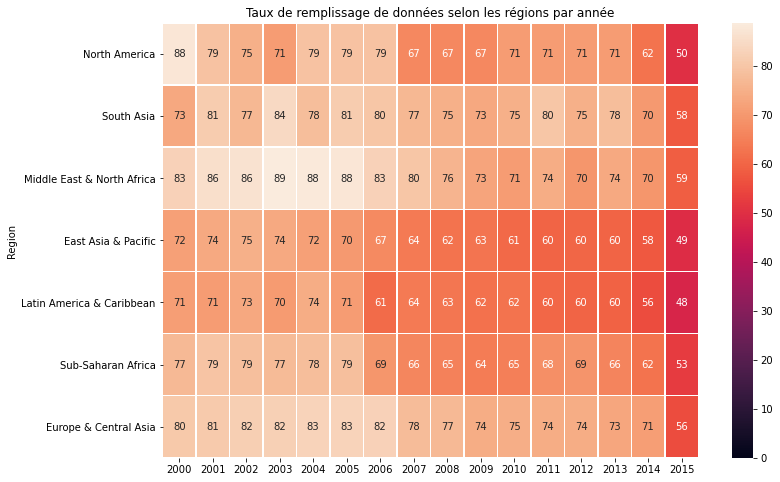

In [60]:
# Heatmap du taux de remplissage de données selon les régions par année
plt.figure(figsize=(12,8))
sns.heatmap(tab, vmin=0,linewidths=.5, annot=True)
plt.title('Taux de remplissage de données selon les régions par année')
nom = str('Taux de remplissage de données selon les régions par année')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

In [61]:
# Regroupement du nombre de valeurs par indicateur
indicator_values = df.groupby('Indicator Code').count()
indicator_values

,Country Code,Region,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Code,,,,,,,,,,,,,,,,,,,,
IT.CMP.PCMP.P2,242,215,242,242,187,207,206,203,204,196,117,49,27,3,0,0,0,0,0,0
IT.NET.USER.P2,242,215,242,242,221,222,224,218,221,223,222,229,228,227,227,229,227,226,223,223
NY.GDP.PCAP.CD,242,215,242,242,224,224,228,228,229,229,230,229,228,227,228,228,224,225,219,218
SE.TER.ENRL,242,215,242,242,149,148,158,159,159,154,154,154,159,162,165,167,166,156,149,116
SP.POP.1524.TO.UN,242,215,242,242,190,191,192,192,191,191,187,181,181,181,181,181,181,181,181,181
SP.POP.TOTL,242,215,242,242,240,240,240,240,240,240,240,240,240,240,240,240,239,239,232,232
UIS.E.3,242,215,242,242,173,174,175,171,182,182,175,180,177,177,174,179,177,165,143,7
UIS.E.4,242,215,242,242,111,113,103,106,103,100,95,101,100,98,95,96,99,108,88,2


In [62]:
# Récupération de la liste des années
year.pop()

'Indicator Code'

In [63]:
# Remplissage en % des données des indicateurs pré-sélectionnés par année
tab_tf = indicator_values.apply(lambda x: np.around(100 * x/x['Country Code'], decimals = 1), axis=1)
tab_tf[year]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Code,,,,,,,,,,,,,,,,
IT.CMP.PCMP.P2,77.3,85.5,85.1,83.9,84.3,81.0,48.3,20.2,11.2,1.2,0.0,0.0,0.0,0.0,0.0,0.0
IT.NET.USER.P2,91.3,91.7,92.6,90.1,91.3,92.1,91.7,94.6,94.2,93.8,93.8,94.6,93.8,93.4,92.1,92.1
NY.GDP.PCAP.CD,92.6,92.6,94.2,94.2,94.6,94.6,95.0,94.6,94.2,93.8,94.2,94.2,92.6,93.0,90.5,90.1
SE.TER.ENRL,61.6,61.2,65.3,65.7,65.7,63.6,63.6,63.6,65.7,66.9,68.2,69.0,68.6,64.5,61.6,47.9
SP.POP.1524.TO.UN,78.5,78.9,79.3,79.3,78.9,78.9,77.3,74.8,74.8,74.8,74.8,74.8,74.8,74.8,74.8,74.8
SP.POP.TOTL,99.2,99.2,99.2,99.2,99.2,99.2,99.2,99.2,99.2,99.2,99.2,99.2,98.8,98.8,95.9,95.9
UIS.E.3,71.5,71.9,72.3,70.7,75.2,75.2,72.3,74.4,73.1,73.1,71.9,74.0,73.1,68.2,59.1,2.9
UIS.E.4,45.9,46.7,42.6,43.8,42.6,41.3,39.3,41.7,41.3,40.5,39.3,39.7,40.9,44.6,36.4,0.8


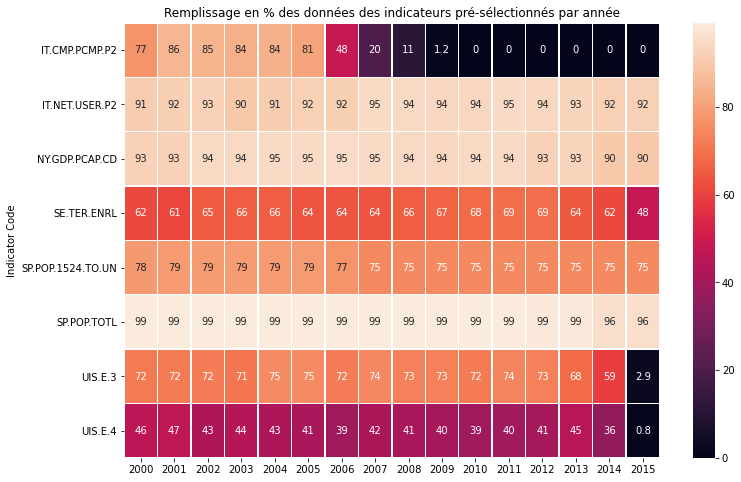

In [64]:
# Représentation par carte de chaleur
plt.figure(figsize=(12,8))
sns.heatmap(tab_tf[year], vmin = 0, linewidths=.5, annot=True)
plt.title('Remplissage en % des données des indicateurs pré-sélectionnés par année')
nom = str('Remplissage en % des données des indicateurs pré-sélectionnés par année')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

On décide ici de ne pas étudier l'indicateur "Personal computers (per 100 people) : IT.CMP.PCMP.P2" car il n'y a pas assez de données.

L'année 2015 a également des données manquantes sur 2 des indicateurs choisis.

In [65]:
# Suppression de l'année 2015 
del year[15]
year

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [66]:
# Reset de nos colonnes avec ajout de la colonne Région
colonnes = ind + year
colonnes.insert(1,'Region')
colonnes

['Country Name',
 'Region',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [67]:
# Suppression de l'indicateur où il manque des données
indicators.remove('IT.CMP.PCMP.P2')
indicators

['UIS.E.3',
 'UIS.E.4',
 'SE.TER.ENRL',
 'SP.POP.1524.TO.UN',
 'SP.POP.TOTL',
 'NY.GDP.PCAP.CD',
 'IT.NET.USER.P2']

In [68]:
df = df[colonnes]

In [69]:
df = df[df['Indicator Code'].isin(indicators)]

In [70]:
df.isna().sum()

Country Name        0
Region            189
Country Code        0
Indicator Name      0
Indicator Code      0
2000              386
2001              382
2002              374
2003              380
2004              369
2005              375
2006              391
2007              380
2008              381
2009              382
2010              384
2011              374
2012              381
2013              394
2014              459
dtype: int64

In [71]:
df[df['Region'] == np.nan]

,Country Name,Region,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014


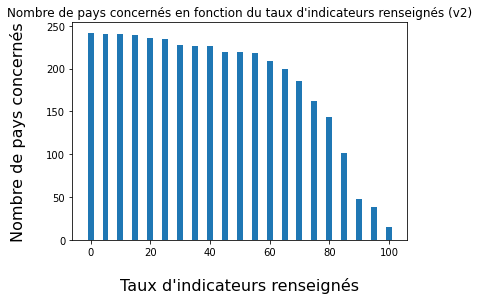

In [72]:
# Mise à jour
indicateurs_rens = df.groupby(['Country Name']).count()
taux = np.around(indicateurs_rens[year].sum(axis = 1)*100/(len(indicators)*len(year)), decimals=1)

def g(x):
    return(len(df['Country Code'].unique())-len(list(taux[taux<x].index)))
   
def graphe(f,a,b,N):
    lx = [a+i*(b-a)/N for i in range(N+1)]
    ly = [f(x) for x in lx]
    plt.bar(lx,ly, width = 2)
    plt.xlabel('Taux d\'indicateurs renseignés', fontsize = 16, labelpad = 20)
    plt.ylabel('Nombre de pays concernés', fontsize = 16, labelpad = 20)
    plt.title('Nombre de pays concernés en fonction du taux d\'indicateurs renseignés (v2)')
    nom = str('Nombre de pays concernés en fonction du taux d\'indicateurs renseignés (v2)')
    plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
    plt.show() 
graphe(g,0,100,20)

In [73]:
# Nombre de pays ayant toutes les données renseignées
len(list(taux[taux==100].index))

15

A présent, 15 pays ont tous les indicateurs renseignés sur toute la période d'étude.

## Choix des années de référence

Sur notre période d'étude, 2014 est l'année la plus récente, elle sera donc une année de référence.
Etudions à présent le taux de données par indicateur et par région selon chaque année afin d'en sélectionner une autre.

In [74]:
# Comptage du nombre de données par indicateur et par région
ref = (df.groupby(['Region', 'Indicator Code']).count())
ref.head(len(indicators))


Country Name  Country Code  \
Region              Indicator Code                                  
East Asia & Pacific IT.NET.USER.P2               36            36   
                    NY.GDP.PCAP.CD               36            36   
                    SE.TER.ENRL                  36            36   
                    SP.POP.1524.TO.UN            36            36   
                    SP.POP.TOTL                  36            36   
                    UIS.E.3                      36            36   
                    UIS.E.4                      36            36   

                                       Indicator Name  2000  2001  2002  2003  \
Region              Indicator Code                                              
East Asia & Pacific IT.NET.USER.P2                 36    31    31    32    30   
                    NY.GDP.PCAP.CD                 36    32    30    33    33   
                    SE.TER.ENRL                    36    19    19    20    19   
                    SP.POP.1524.TO.UN              36    30    30    30    30   
                    SP.POP.TOTL                    36    36    36    36    36   
                    UIS.E.3                        36    19    23    23    22   
                    UIS.E.4                        36    12    13    12    12   

                                       2004  2005  2006  2007  2008  2009  \
Region              Indicator Code                                          
East Asia & Pacific IT.NET.USER.P2       30    31    31    33    33    33   
                    NY.GDP.PCAP.CD       33    33    33    33    33    33   
                    SE.TER.ENRL          17    17    16    17    17    19   
                    SP.POP.1524.TO.UN    30    30    30    27    27    27   
                    SP.POP.TOTL          36    36    36    36    36    36   
                    UIS.E.3              22    20    23    22    20    21   
                    UIS.E.4              10     9    10    11    12    11   

                                       2010  2011  2012  2013  2014  
Region              Indicator Code                                   
East Asia & Pacific IT.NET.USER.P2       33    33    33    32    32  
                    NY.GDP.PCAP.CD       33    33    33    33    33  
                    SE.TER.ENRL          18    19    18    17    15  
                    SP.POP.1524.TO.UN    27    27    27    27    27  
                    SP.POP.TOTL          36    36    36    36    36  
                    UIS.E.3              18    16    17    16    15  
                    UIS.E.4              10     8     9    11     8

In [75]:
# Calcul en taux par rapport au nombre de pays de chaque région
total_ref = ref.apply(lambda x: np.around(100 * x/x['Indicator Name'], decimals = 1), axis=1).iloc[:,3:]
total_ref.head(len(indicators))


2000   2001   2002   2003   2004  \
Region              Indicator Code                                         
East Asia & Pacific IT.NET.USER.P2      86.1   86.1   88.9   83.3   83.3   
                    NY.GDP.PCAP.CD      88.9   83.3   91.7   91.7   91.7   
                    SE.TER.ENRL         52.8   52.8   55.6   52.8   47.2   
                    SP.POP.1524.TO.UN   83.3   83.3   83.3   83.3   83.3   
                    SP.POP.TOTL        100.0  100.0  100.0  100.0  100.0   
                    UIS.E.3             52.8   63.9   63.9   61.1   61.1   
                    UIS.E.4             33.3   36.1   33.3   33.3   27.8   

                                        2005   2006   2007   2008   2009  \
Region              Indicator Code                                         
East Asia & Pacific IT.NET.USER.P2      86.1   86.1   91.7   91.7   91.7   
                    NY.GDP.PCAP.CD      91.7   91.7   91.7   91.7   91.7   
                    SE.TER.ENRL         47.2   44.4   47.2   47.2   52.8   
                    SP.POP.1524.TO.UN   83.3   83.3   75.0   75.0   75.0   
                    SP.POP.TOTL        100.0  100.0  100.0  100.0  100.0   
                    UIS.E.3             55.6   63.9   61.1   55.6   58.3   
                    UIS.E.4             25.0   27.8   30.6   33.3   30.6   

                                        2010   2011   2012   2013   2014  
Region              Indicator Code                                        
East Asia & Pacific IT.NET.USER.P2      91.7   91.7   91.7   88.9   88.9  
                    NY.GDP.PCAP.CD      91.7   91.7   91.7   91.7   91.7  
                    SE.TER.ENRL         50.0   52.8   50.0   47.2   41.7  
                    SP.POP.1524.TO.UN   75.0   75.0   75.0   75.0   75.0  
                    SP.POP.TOTL        100.0  100.0  100.0  100.0  100.0  
                    UIS.E.3             50.0   44.4   47.2   44.4   41.7  
                    UIS.E.4             27.8   22.2   25.0   30.6   22.2

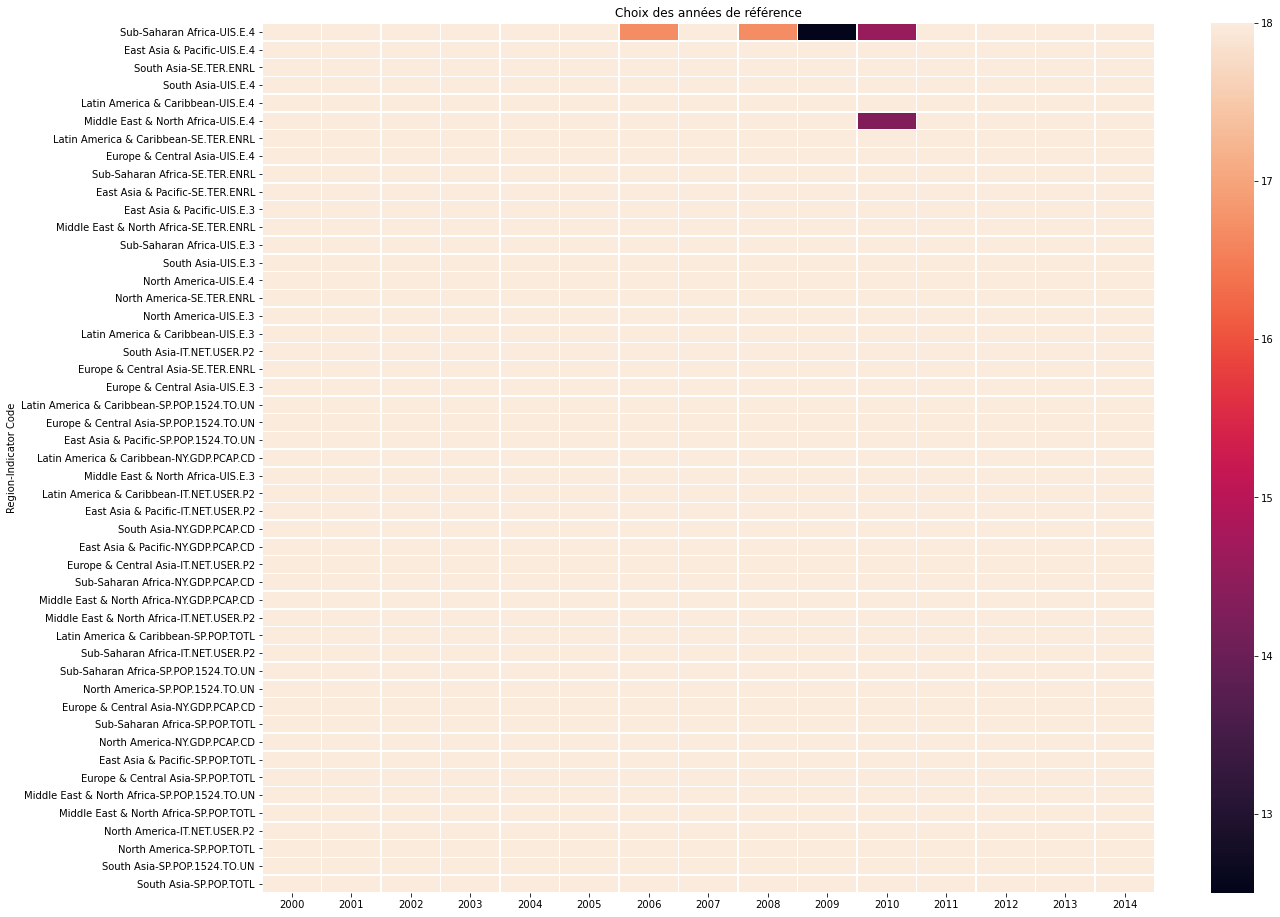

In [76]:
# Heatmap pour se rendre compte des années intéressantes
plt.figure(figsize=(20,16))
sns.heatmap(total_ref.sort_values(by=year), vmax = 18,linewidths=.5)
plt.title('Choix des années de référence')
nom = str('Choix des années de référence')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()


Le paramètre 'vmax' a été obtenu par dichotomie afin de faire ressortir les années où il y a moins de données.
2006, 2008, 2009 et 2010 sont les moins intéressantes de ce point de vue.
L'année 2007 est intéressante comme choix d'année de référence.

# Détection et remplacement des valeurs absurdes (outliers)

### Préparation
On prépare le tri en ajoutant ligne par ligne la médiane sur la période d'étude. De même avec les seuils des outliers. 

In [77]:
df1 = df.copy()
df1['Mediane'] = df1[year].median(axis = 1)
df1['q5'] = df1[year].quantile(0.05,axis = 1)
df1['q95'] = df1[year].quantile(0.95,axis = 1)
mes_colonnes = ['Country Name','Region', 'Indicator Code', 'Mediane', 'q5', 'q95', '2007', '2014']
df1[mes_colonnes].head(len(indicators))

,Country Name,Region,Indicator Code,Mediane,q5,q95,2007,2014
0,Aruba,Latin America & Caribbean,UIS.E.4,124.000000,124.000000,124.000000,NaN,NaN
1,Aruba,Latin America & Caribbean,SE.TER.ENRL,2094.000000,1218.800000,2539.100000,2232.000000,1235.00
2,Aruba,Latin America & Caribbean,UIS.E.3,3883.000000,3238.400000,4594.400000,4430.000000,NaN
3,Aruba,Latin America & Caribbean,NY.GDP.PCAP.CD,23658.888128,20536.820091,26652.669054,25921.026052,NaN
4,Aruba,Latin America & Caribbean,IT.NET.USER.P2,30.900000,16.602847,80.364000,30.900000,83.78
6,Aruba,Latin America & Caribbean,SP.POP.1524.TO.UN,13260.000000,11408.900000,14068.900000,13298.000000,14253.00
7,Aruba,Latin America & Caribbean,SP.POP.TOTL,101220.000000,92284.500000,103369.400000,101220.000000,103795.00


Les valeurs absurdes seront détectées lorsque leur valeur sera dans les quantiles définis à 5% et 95%.
Le choix sera de les remplacer par le q5 s'ils y sont inférieurs, et par le q95 s'ils y sont supérieurs, pour les années de référence.
Il faut cependant d'abord remplacer les valeurs manquantes.

# Remplacement des valeurs manquantes

In [78]:
# Remplacement des valeurs manquantes en utilisant la médiane
df2 = df.copy()
df2.head(2)

,Country Name,Region,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,Latin America & Caribbean,ABW,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,Latin America & Caribbean,ABW,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1578.0,1628.0,1592.0,1672.0,1704.0,2106.0,2094.0,2232.0,2242.0,2196.0,2330.0,2504.0,2621.0,1181.0,1235.0


## Remplacement pour les données manquantes par année

In [79]:
df2['Mediane'] = df[year].median(axis = 1)
df2 = df2.apply(lambda x: x.fillna(x['Mediane']), axis = 1)
df2['Region'] = df['Region'] # Cette ligne est utile car il y a des valeurs manquantes dans la colonne 'Region'
df2.head(2)

,Country Name,Region,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Mediane
0,Aruba,Latin America & Caribbean,ABW,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,124.0,124.0,124.0,124.0,124.0,...,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0
1,Aruba,Latin America & Caribbean,ABW,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1578.0,1628.0,1592.0,1672.0,1704.0,...,2094.0,2232.0,2242.0,2196.0,2330.0,2504.0,2621.0,1181.0,1235.0,2094.0


Il reste certains indicateurs pour certains pays avec aucune donnée sur la période d'étude.
Le choix est fait ici de ne pas les remplacer ; en effet, il aurait été possible de les remplacer par les médianes du même indicateur pour la même région mais cela risque d'influencer énormément sur les résultats, surtout pour des pays qui n'ont pas la même typologie (population, richesse, etc).

In [80]:
df2['q5'] = df2[year].quantile(0.05,axis = 1)
df2['q95'] = df2[year].quantile(0.95,axis = 1)
df2[mes_colonnes].head(len(indicators))

,Country Name,Region,Indicator Code,Mediane,q5,q95,2007,2014
0,Aruba,Latin America & Caribbean,UIS.E.4,124.000000,124.000000,124.000000,124.000000,124.000000
1,Aruba,Latin America & Caribbean,SE.TER.ENRL,2094.000000,1218.800000,2539.100000,2232.000000,1235.000000
2,Aruba,Latin America & Caribbean,UIS.E.3,3883.000000,3258.300000,4553.300000,4430.000000,3883.000000
3,Aruba,Latin America & Caribbean,NY.GDP.PCAP.CD,23658.888128,20564.780269,26408.788053,25921.026052,23658.888128
4,Aruba,Latin America & Caribbean,IT.NET.USER.P2,30.900000,16.602847,80.364000,30.900000,83.780000
6,Aruba,Latin America & Caribbean,SP.POP.1524.TO.UN,13260.000000,11408.900000,14068.900000,13298.000000,14253.000000
7,Aruba,Latin America & Caribbean,SP.POP.TOTL,101220.000000,92284.500000,103369.400000,101220.000000,103795.000000


#### Fonction qui permet de remplacer les outliers

In [81]:
def outliers(x):
    x = (np.where(x < df2['q5'], df2['q5'], 
         np.where(x > df2['q95'], df2['q95'], x)))
    return x
outliers(df2['2007'])
outliers(df2['2014'])
df2[mes_colonnes]

,Country Name,Region,Indicator Code,Mediane,q5,q95,2007,2014
0,Aruba,Latin America & Caribbean,UIS.E.4,124.000000,124.000000,124.000000,124.000000,124.000000
1,Aruba,Latin America & Caribbean,SE.TER.ENRL,2094.000000,1218.800000,2539.100000,2232.000000,1235.000000
2,Aruba,Latin America & Caribbean,UIS.E.3,3883.000000,3258.300000,4553.300000,4430.000000,3883.000000
3,Aruba,Latin America & Caribbean,NY.GDP.PCAP.CD,23658.888128,20564.780269,26408.788053,25921.026052,23658.888128
4,Aruba,Latin America & Caribbean,IT.NET.USER.P2,30.900000,16.602847,80.364000,30.900000,83.780000
...,...,...,...,...,...,...,...,...
1930,British Virgin Islands,Latin America & Caribbean,UIS.E.3,NaN,NaN,NaN,NaN,NaN
1931,British Virgin Islands,Latin America & Caribbean,NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN
1932,British Virgin Islands,Latin America & Caribbean,IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN
1934,British Virgin Islands,Latin America & Caribbean,SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN


### Suppression des lignes dont aucune info n'est renseignée

On supprime donc pour chaque indicateur de chaque pays, la ligne où aucune donnée n'a été enregistrée sur la période d'étude.

In [82]:
index_with_nan = df2.index[df2.isnull().any(axis=1)]
ligne_supp = np.around(100*len(index_with_nan)/df2.shape[0], decimals=1)
print(ligne_supp,'% de lignes seront supprimées')

20.1 % de lignes seront supprimées


Environ 20% de pertes de lignes semble acceptable pour poursuivre notre étude.

In [83]:
df2.drop(index_with_nan,0, inplace=True)

In [84]:
df3 = df2.reset_index()[mes_colonnes]

In [85]:
df3_2007 = df3[['Country Name', 'Region', 'Indicator Code', '2007']]
df3_2014 = df3[['Country Name', 'Region', 'Indicator Code', '2014']]

Nous allons concaténer ces deux tableaux afin de séparer les lignes correspondant aux années 2007 et 2014.
Cela aura pour effet de multiplier le nombre de lignes par 2, et de créer des valeurs NaN qu'il faudra traiter.

In [86]:
df4 = pd.concat([df3_2007, df3_2014])
df5 = df4.copy()
df4.head(2)

,Country Name,Region,Indicator Code,2007,2014
0,Aruba,Latin America & Caribbean,UIS.E.4,124.0,NaN
1,Aruba,Latin America & Caribbean,SE.TER.ENRL,2232.0,NaN


In [87]:
# Création d'une colonne afin de savoir de quelle année il s'agit
df4['Année'] = ['2007' if x >=0 else '2014' for x in df4['2007']]
df4.reset_index()

,index,Country Name,Region,Indicator Code,2007,2014,Année
0,0,Aruba,Latin America & Caribbean,UIS.E.4,124.000000,NaN,2007
1,1,Aruba,Latin America & Caribbean,SE.TER.ENRL,2232.000000,NaN,2007
2,2,Aruba,Latin America & Caribbean,UIS.E.3,4430.000000,NaN,2007
3,3,Aruba,Latin America & Caribbean,NY.GDP.PCAP.CD,25921.026052,NaN,2007
4,4,Aruba,Latin America & Caribbean,IT.NET.USER.P2,30.900000,NaN,2007
...,...,...,...,...,...,...,...
2701,1348,Zimbabwe,Sub-Saharan Africa,NY.GDP.PCAP.CD,NaN,1.031105e+03,2014
2702,1349,Zimbabwe,Sub-Saharan Africa,IT.NET.USER.P2,NaN,1.636474e+01,2014
2703,1350,Zimbabwe,Sub-Saharan Africa,SP.POP.1524.TO.UN,NaN,3.354236e+06,2014
2704,1351,Zimbabwe,Sub-Saharan Africa,SP.POP.TOTL,NaN,1.541168e+07,2014


Ajout d'une seule colonne pour les valeurs et suppression des colonnes 2007 et 2014 : en effet, la colonne valeur et la colonne Année permettent de ne pas avoir de pertes d'informations.

In [88]:
df4['Valeur'] = np.where(df4['Année'] == '2007', df4['2007'], df4['2014'])
df4.drop(['2007','2014'],1, inplace=True)
df4

,Country Name,Region,Indicator Code,Année,Valeur
0,Aruba,Latin America & Caribbean,UIS.E.4,2007,1.240000e+02
1,Aruba,Latin America & Caribbean,SE.TER.ENRL,2007,2.232000e+03
2,Aruba,Latin America & Caribbean,UIS.E.3,2007,4.430000e+03
3,Aruba,Latin America & Caribbean,NY.GDP.PCAP.CD,2007,2.592103e+04
4,Aruba,Latin America & Caribbean,IT.NET.USER.P2,2007,3.090000e+01
...,...,...,...,...,...
1348,Zimbabwe,Sub-Saharan Africa,NY.GDP.PCAP.CD,2014,1.031105e+03
1349,Zimbabwe,Sub-Saharan Africa,IT.NET.USER.P2,2014,1.636474e+01
1350,Zimbabwe,Sub-Saharan Africa,SP.POP.1524.TO.UN,2014,3.354236e+06
1351,Zimbabwe,Sub-Saharan Africa,SP.POP.TOTL,2014,1.541168e+07


In [89]:
df4 = df4.sort_values(['Indicator Code', 'Valeur']).reset_index()

In [90]:
df4.drop('index', 1, inplace=True)
df4

,Country Name,Region,Indicator Code,Année,Valeur
0,"Korea, Dem. People’s Rep.",East Asia & Pacific,IT.NET.USER.P2,2007,0.000000e+00
1,"Korea, Dem. People’s Rep.",East Asia & Pacific,IT.NET.USER.P2,2014,0.000000e+00
2,Myanmar,East Asia & Pacific,IT.NET.USER.P2,2007,2.171284e-01
3,Sierra Leone,Sub-Saharan Africa,IT.NET.USER.P2,2007,2.398347e-01
4,"Congo, Dem. Rep.",Sub-Saharan Africa,IT.NET.USER.P2,2007,3.700000e-01
...,...,...,...,...,...
2701,"Iran, Islamic Rep.",Middle East & North Africa,UIS.E.4,2007,8.048800e+05
2702,"Iran, Islamic Rep.",Middle East & North Africa,UIS.E.4,2014,8.048800e+05
2703,India,South Asia,UIS.E.4,2007,9.247510e+05
2704,United States,North America,UIS.E.4,2014,1.147566e+06


# Analyse graphique

## Analyse de tous les indicateurs

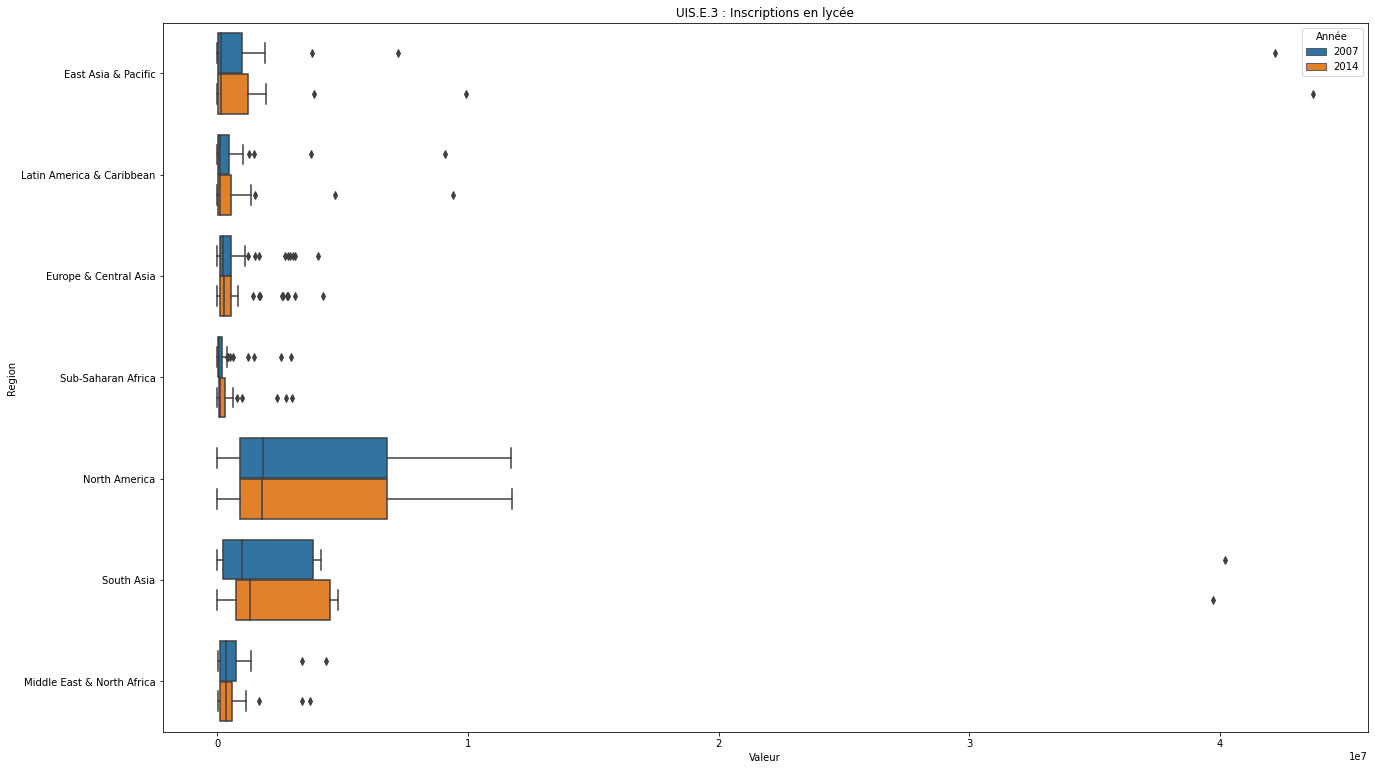

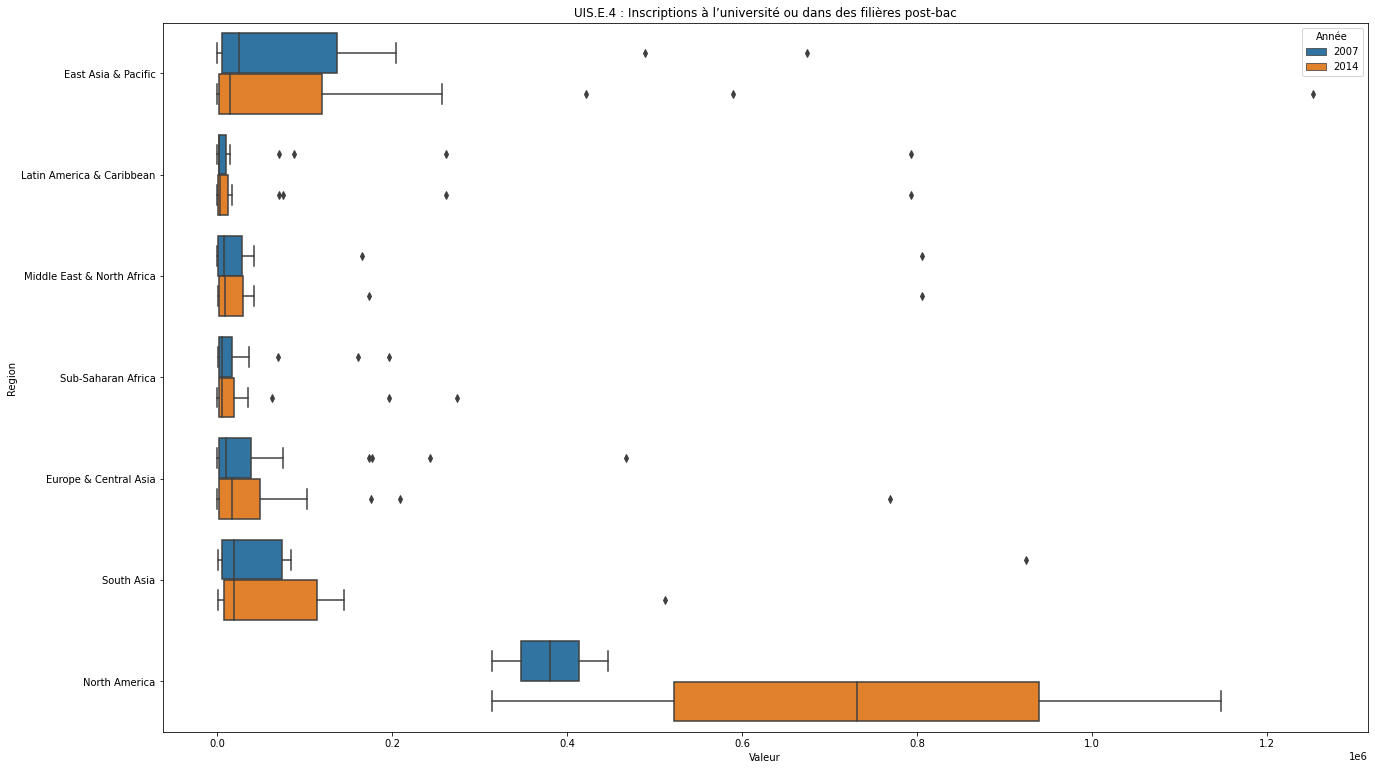

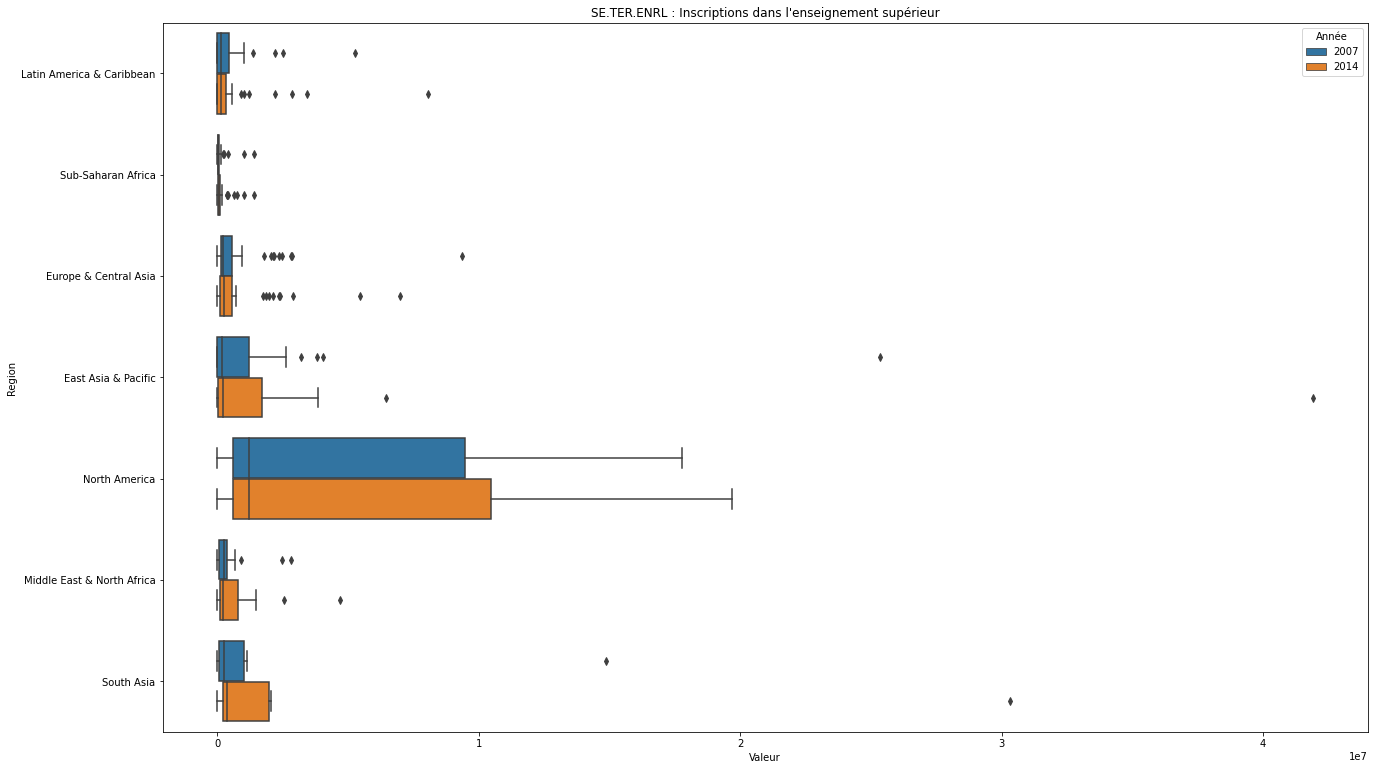

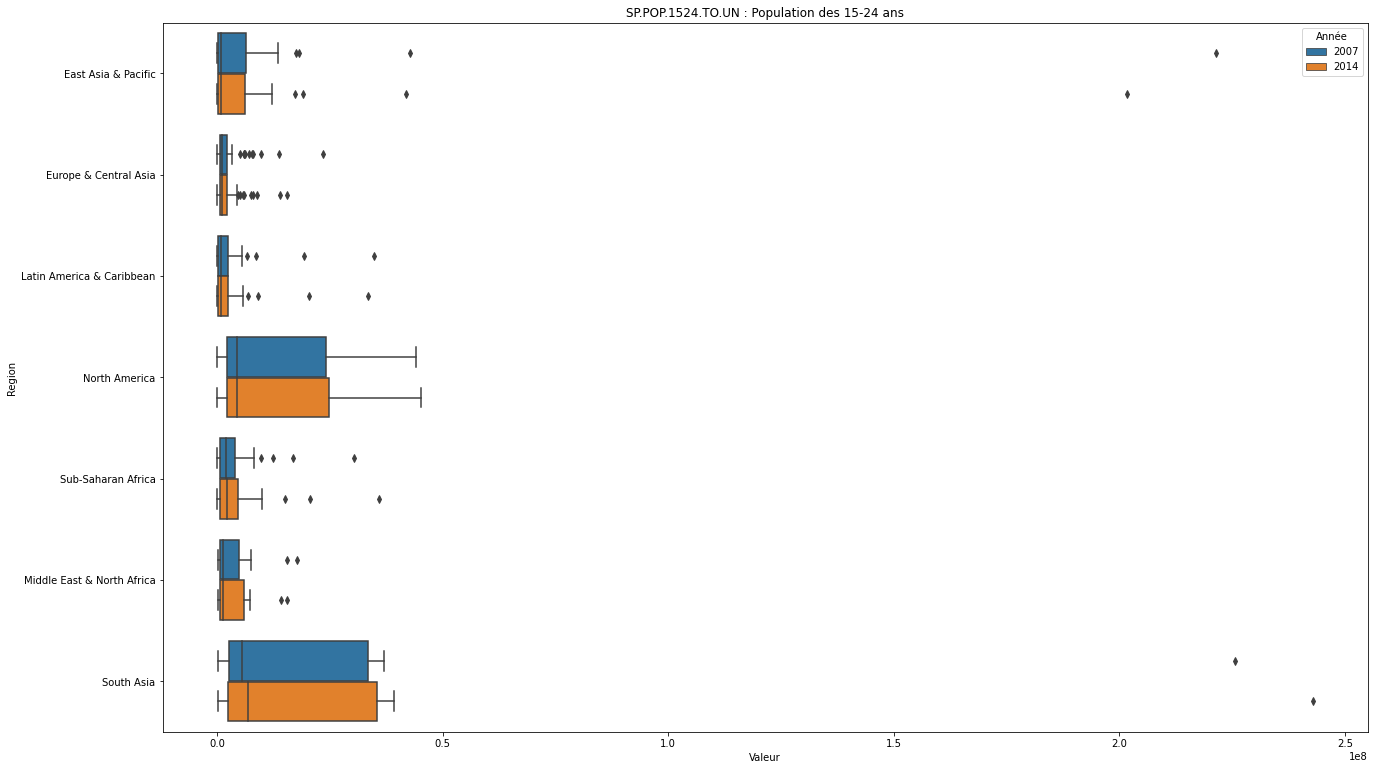

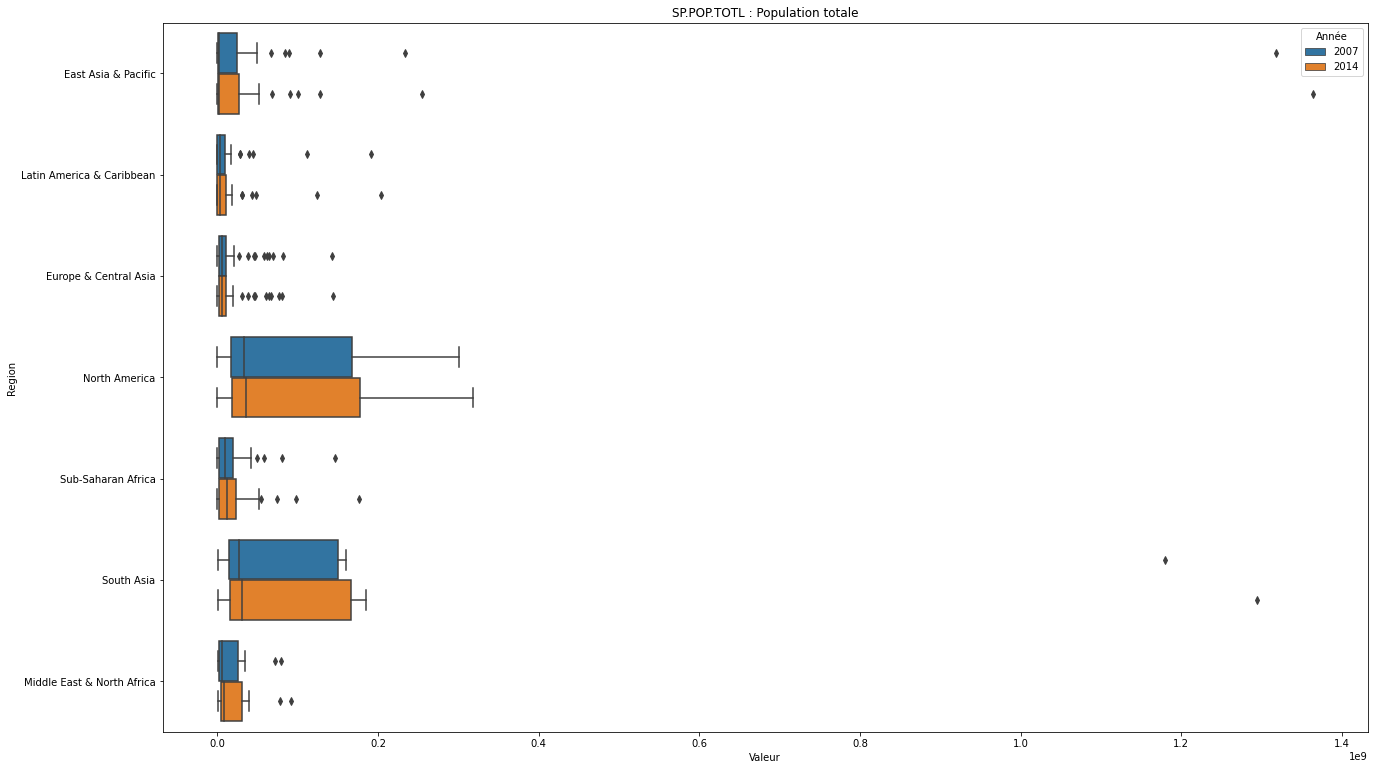

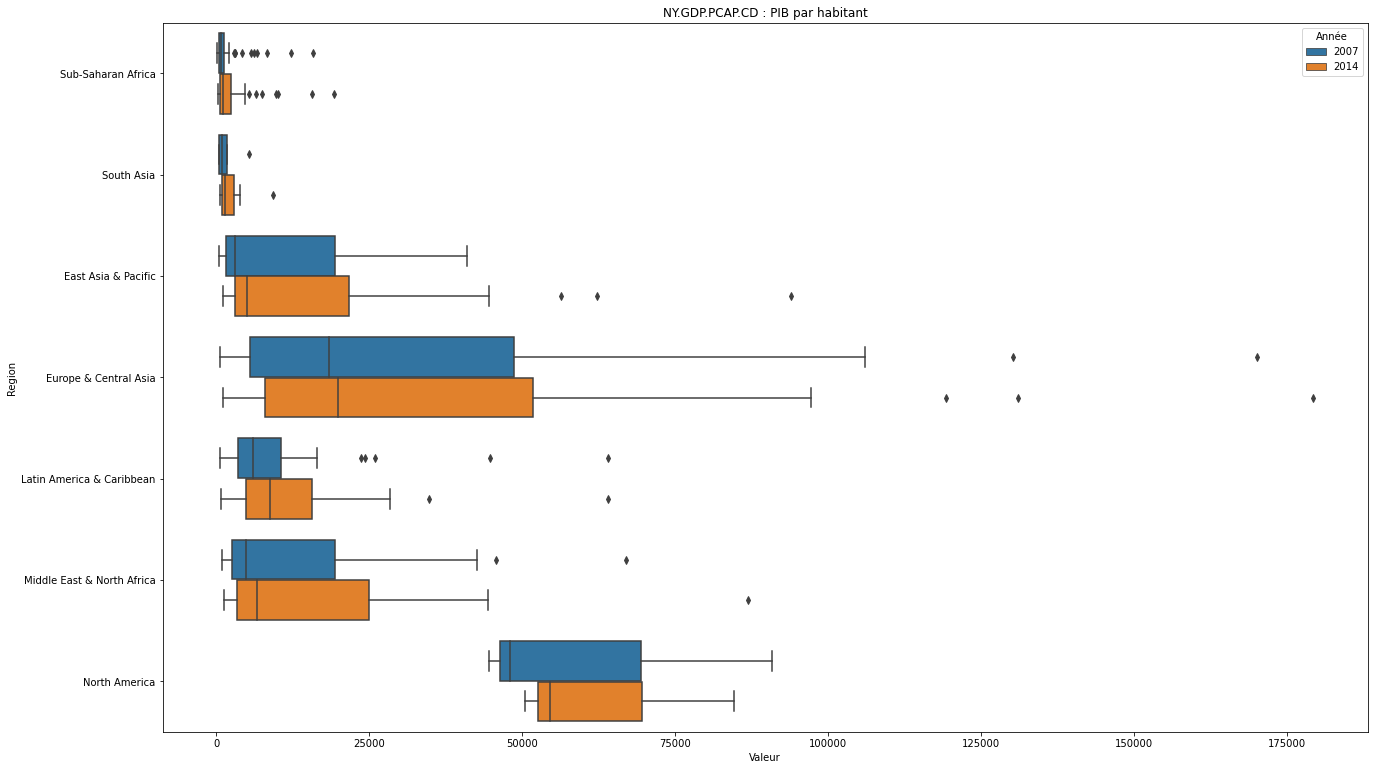

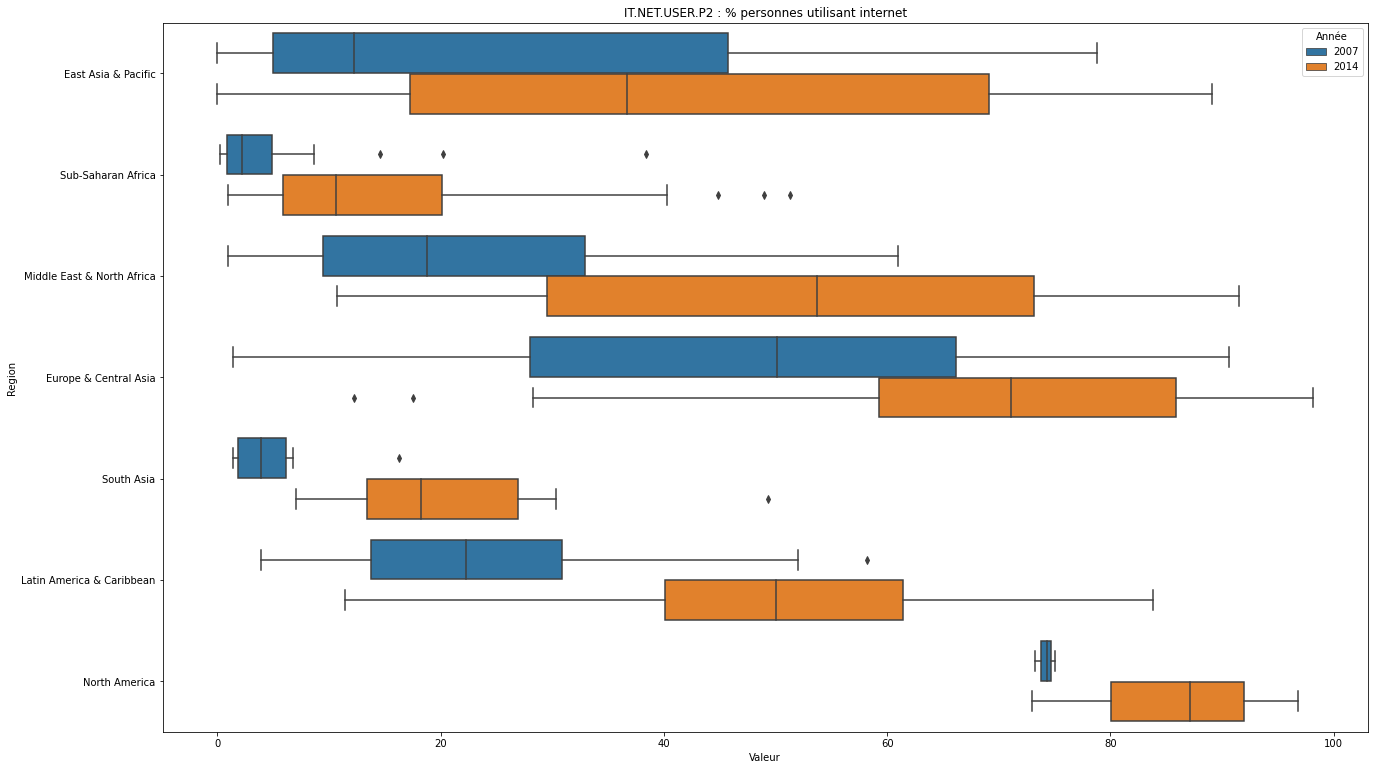

In [91]:
# Evolution des valeurs de chaque indicateur par région entre 2007 et 2014
n = len(indicators)


for j in range(1, n+1):
    plt.figure(figsize=(19.20,10.80))
    sns.boxplot(x='Valeur', y='Region', data = df4[df4['Indicator Code'] == indicators[j-1]], hue = 'Année')
    plt.title(indicators[j-1]+str(' : ')+indicateurs[indicators[j-1]])
    plt.tight_layout()
    nom = str(indicators[j-1]) + '.png'
    
    plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi\Boxplot', str(indicators[j-1]) +'.png'))
    

plt.show()



On souhaite plutôt observer uniquement la moyenne ou la médiane de ces indicateurs pour le moment.
De plus, le tri ne fonctionne pas très bien lorsque l'on souhaite étudier plusieurs indicateurs à la fois.

## Autre approche

Nous étudions par exemple seulement la moyenne de nos valeurs.

<Figure size 1382.4x777.6 with 0 Axes>

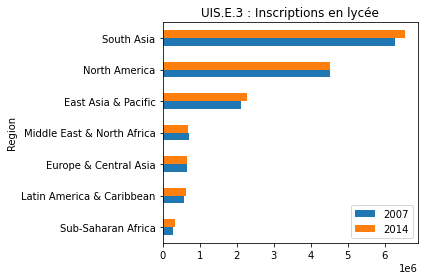

<Figure size 1382.4x777.6 with 0 Axes>

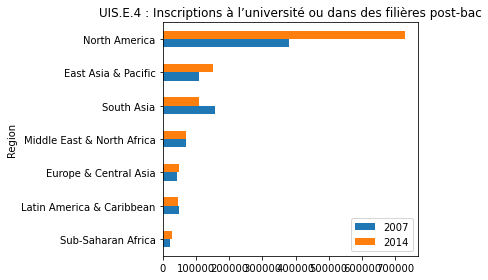

<Figure size 1382.4x777.6 with 0 Axes>

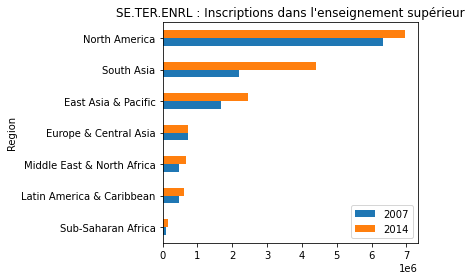

<Figure size 1382.4x777.6 with 0 Axes>

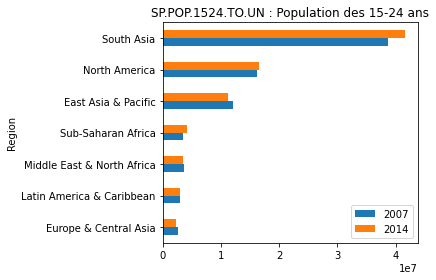

<Figure size 1382.4x777.6 with 0 Axes>

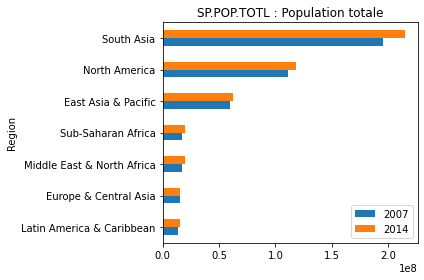

<Figure size 1382.4x777.6 with 0 Axes>

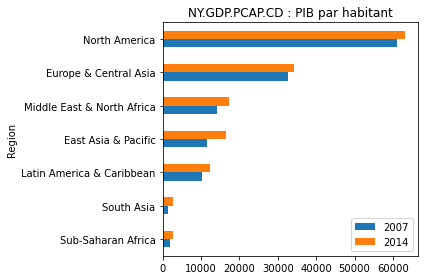

<Figure size 1382.4x777.6 with 0 Axes>

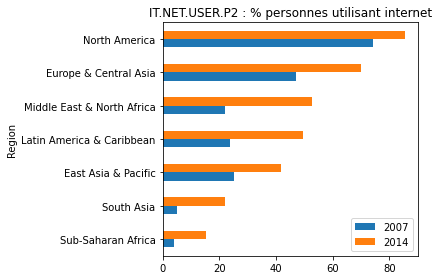

In [92]:
# Evolution de la moyenne de chaque indicateur par région entre 2007 et 2014
n = len(indicators)


for j in range(1, n+1):
    plt.figure(figsize=(19.20,10.80))
    mydata = df5[df5['Indicator Code'] == indicators[j-1]].groupby(['Region']).mean().sort_values('2014')
    mydata.plot(kind="barh")
    plt.title(indicators[j-1]+str(' : ')+indicateurs[indicators[j-1]])
    plt.tight_layout()
    nom = str(indicators[j-1]) + '.png'
    
    plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi\Moyenne', str(indicators[j-1]) +'.png'))
    

plt.show()

## Analyse de la moyenne du % de personnes utilisant internet par région en 2007 et 2014

Dans chaque région, la moyenne du % de personnes utilisant internet a augmenté entre 2007 et 2014.
Indépendemment donc du nombre d'habitants, c'est dans la région Amérique du Nord qu'il y a le plus grand taux d'utilisateurs (>80% en 2014.
On se concentre sur l'année la plus récente, c'est-à-dire 2014.

L'Europe et l'Asie Centrale est la deuxième région ayant le plus de d'utilisateurs d'internet.
A contrario, les 2 régions avec peu d'utilisateurs sont l'Asie du Sud et l'Afrique Sub-Saharienne (<20%).
Il y a donc un potentiel moins élvé dans ces régions pour répondre à la problématique, même si leur potentiel d'évolution reste important.
Enfin pour les 3 autres régions, le taux est d'environ 50%.

Regardons uniquement la moyenne pour l'année 2014.
Analysons en même temps un autre indicateur qui semble intéressant afin de voir plus en profondeur.

<Figure size 1382.4x777.6 with 0 Axes>

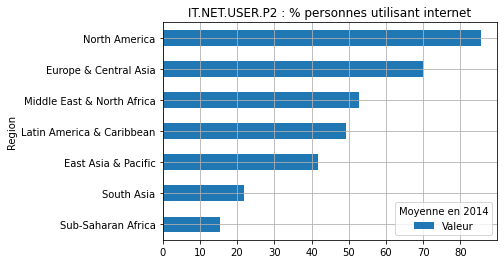

In [93]:
# Moyenne du % de personnes utilisant internet par région en 2014
plt.figure(figsize=(19.20,10.80))
References = ['2014']
k = [6,3]

mydata = df4[(df4['Année'] == References[0]) & (df4['Indicator Code'] == indicators[k[0]])].groupby('Region').mean().sort_values('Valeur')
mydata.plot(kind='barh')
plt.legend(title = 'Moyenne en 2014')
plt.title(indicators[k[0]]+str(' : ')+indicateurs[indicators[k[0]]])
nom = str(indicators[k[0]]+str(' : ')+indicateurs[indicators[k[0]]])
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.grid()
plt.show()


<Figure size 1382.4x777.6 with 0 Axes>

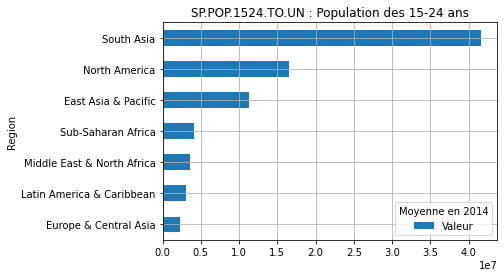

In [94]:
# Moyenne de la population âgée de 15 à 24 ans par région en 2014
plt.figure(figsize=(19.20,10.80))
References = ['2014']
k = [6,3]

mydata = df4[(df4['Année'] == References[0]) & (df4['Indicator Code'] == indicators[k[1]])].groupby('Region').mean().sort_values('Valeur')
mydata.plot(kind='barh')
plt.legend(title = 'Moyenne en 2014')
plt.title(indicators[k[1]]+str(' : ')+indicateurs[indicators[k[1]]])
nom = str(indicators[k[1]]+str(' : ')+indicateurs[indicators[k[1]]])
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.grid()
plt.show()


L'Asie du Sud a un gros potentiel en termes de nombre de personnes ayant l'âge visé par rapport aux autres régions, puis vient l'Amérique du Nord et dans une moindre mesure l'Asie de l'Est et le Pacifique.
Les autres régions sont en-deçà.

Il serait intéressant de viser les pays ayant à la fois le plus d'utilisateurs d'internet pour 100 habitants, et à la fois les pays ayant le plus de population âgée de 15 à 24 ans.

In [95]:
internet = df4[(df4['Année'] == References[0]) & (df4['Indicator Code'] == indicators[6])].groupby('Country Name').mean().sort_values('Valeur').reset_index()
internet.shape

(204, 2)

In [96]:
pop15_24 = df4[(df4['Année'] == References[0]) & (df4['Indicator Code'] == indicators[3])].groupby('Country Name').mean().sort_values('Valeur').reset_index()
pop15_24.shape

(192, 2)

On s'aperçoit qu'il y a plus de pays renseignés sur un indicateur.

In [97]:
pays_manquants = list(set(internet['Country Name'])-set(pop15_24['Country Name']))

In [98]:
pays_manquants

['Guam',
 'Puerto Rico',
 'Faroe Islands',
 'New Caledonia',
 'San Marino',
 'Tuvalu',
 'Greenland',
 'Serbia',
 'Monaco',
 'Montenegro',
 'Virgin Islands (U.S.)',
 'French Polynesia']

In [99]:
internet[internet['Country Name'].isin(pays_manquants)].sort_values('Valeur')

,Country Name,Valeur
88,Tuvalu,39.200000
112,Virgin Islands (U.S.),50.070000
113,San Marino,50.341669
130,French Polynesia,60.680000
132,Montenegro,61.000000
135,Serbia,62.075080
144,Greenland,66.700000
150,Guam,69.270000
153,New Caledonia,70.000000
168,Puerto Rico,76.133860


Voici les pays qui ne figureront pas dans le prochain graphique avec leur valeur associée en % de personnes utilisant internet par région en 2014.

In [100]:
# Préparation des tableaux qui vont nous servir au graphique
internet = internet[internet['Country Name'].isin(pop15_24['Country Name'])].sort_values('Valeur').reset_index()
internet.drop('index', 1, inplace=True)
internet

,Country Name,Valeur
0,"Korea, Dem. People’s Rep.",0.00
1,Eritrea,0.99
2,Burundi,1.38
3,Somalia,1.63
4,Niger,1.95
...,...,...
187,Andorra,95.90
188,Denmark,95.99
189,Norway,96.30
190,Bermuda,96.80


In [101]:
# Mise en commun des noms de colonnes pour la jointure 

internet.columns = ['Pays', '% de personnes utilisant internet 2014']
pop15_24.columns = ['Pays', 'Population âgée de 15 à 24 ans en 2014']
pays_region = country1.loc[: , ['Short Name', 'Region']]
pays_region.columns = ['Pays', 'Région']

In [102]:
# Jointures des tableaux 

cible = pd.merge(internet,pop15_24)
cibles = pd.merge(cible, pays_region)
cibles

,Pays,% de personnes utilisant internet 2014,Population âgée de 15 à 24 ans en 2014,Région
0,Eritrea,0.99,1139904.0,Sub-Saharan Africa
1,Burundi,1.38,2068163.0,Sub-Saharan Africa
2,Somalia,1.63,2019132.0,Sub-Saharan Africa
3,Niger,1.95,3338384.0,Sub-Saharan Africa
4,Chad,2.90,2602759.0,Sub-Saharan Africa
...,...,...,...,...
171,Andorra,95.90,7446.0,Europe & Central Asia
172,Denmark,95.99,707094.0,Europe & Central Asia
173,Norway,96.30,646489.0,Europe & Central Asia
174,Bermuda,96.80,6919.5,North America


In [103]:
# Ajout d'une colonne que l'on va renseigner avec l'index de la région présente dans notre liste de régions
cibles['Index_régions'] = 0

In [104]:
# Création de la fonction qui va nous retourner cet index

def index_region(x):
    return regions.index(x)

In [105]:
# Application de la fontion pour chaque ligne de nos cibles

cibles['Index_régions'] = cibles.apply(lambda x: index_region(x['Région']), axis = 1, result_type='expand')

In [106]:
cibles

,Pays,% de personnes utilisant internet 2014,Population âgée de 15 à 24 ans en 2014,Région,Index_régions
0,Eritrea,0.99,1139904.0,Sub-Saharan Africa,2
1,Burundi,1.38,2068163.0,Sub-Saharan Africa,2
2,Somalia,1.63,2019132.0,Sub-Saharan Africa,2
3,Niger,1.95,3338384.0,Sub-Saharan Africa,2
4,Chad,2.90,2602759.0,Sub-Saharan Africa,2
...,...,...,...,...,...
171,Andorra,95.90,7446.0,Europe & Central Asia,3
172,Denmark,95.99,707094.0,Europe & Central Asia,3
173,Norway,96.30,646489.0,Europe & Central Asia,3
174,Bermuda,96.80,6919.5,North America,6


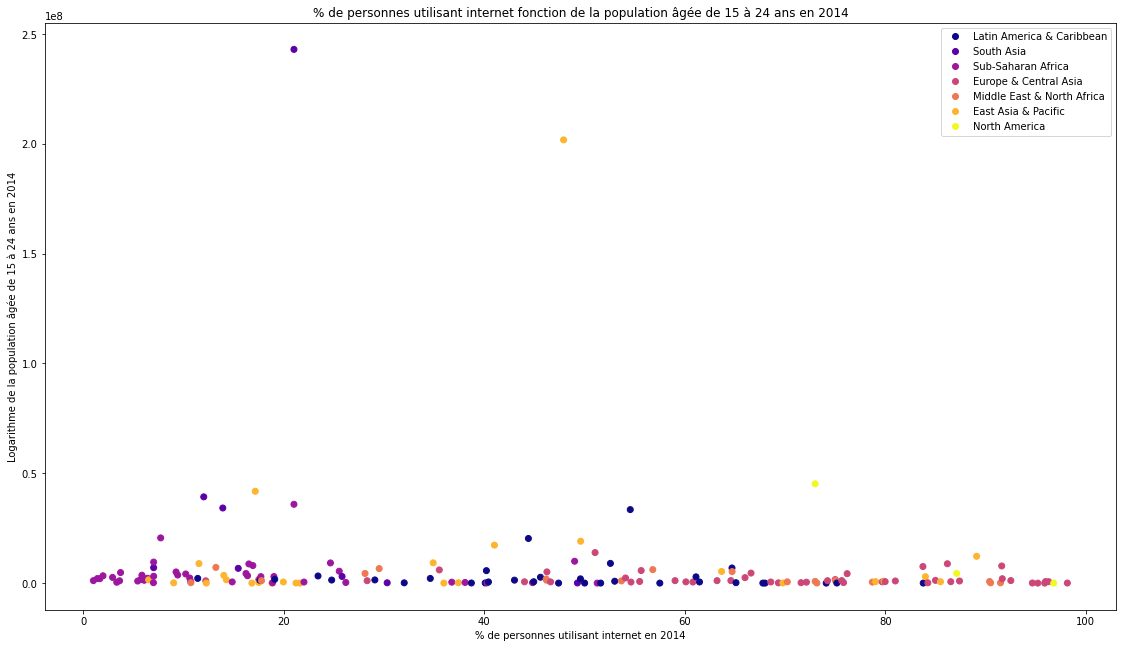

In [107]:
# Graphique qui permet de visualier les pays ayant à la fois le plus d'utilisateurs d'internet pour 100 habitants, 
# et à la fois les pays ayant le plus de population âgée de 15 à 24 ans.

fig,ax = plt.subplots(figsize=(19.20,10.80))
scatter = ax.scatter(x=cibles.iloc[:,1], y=cibles.iloc[:,2], c=cibles['Index_régions'], cmap='plasma')
plt.xlabel('% de personnes utilisant internet en 2014')
plt.ylabel('Logarithme de la population âgée de 15 à 24 ans en 2014')
plt.title('% de personnes utilisant internet fonction de la population âgée de 15 à 24 ans en 2014')
plt.legend(handles=scatter.legend_elements()[0], labels=regions)
nom = str('% de personnes utilisant internet fonction de la population âgée de 15 à 24 ans en 2014')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

On constate ici que la différence des valeurs en ordonnée est trop importante pour visualiser correctement les données.
Une solution est de passer l'échelle des ordonnées en échelle logarithmique.

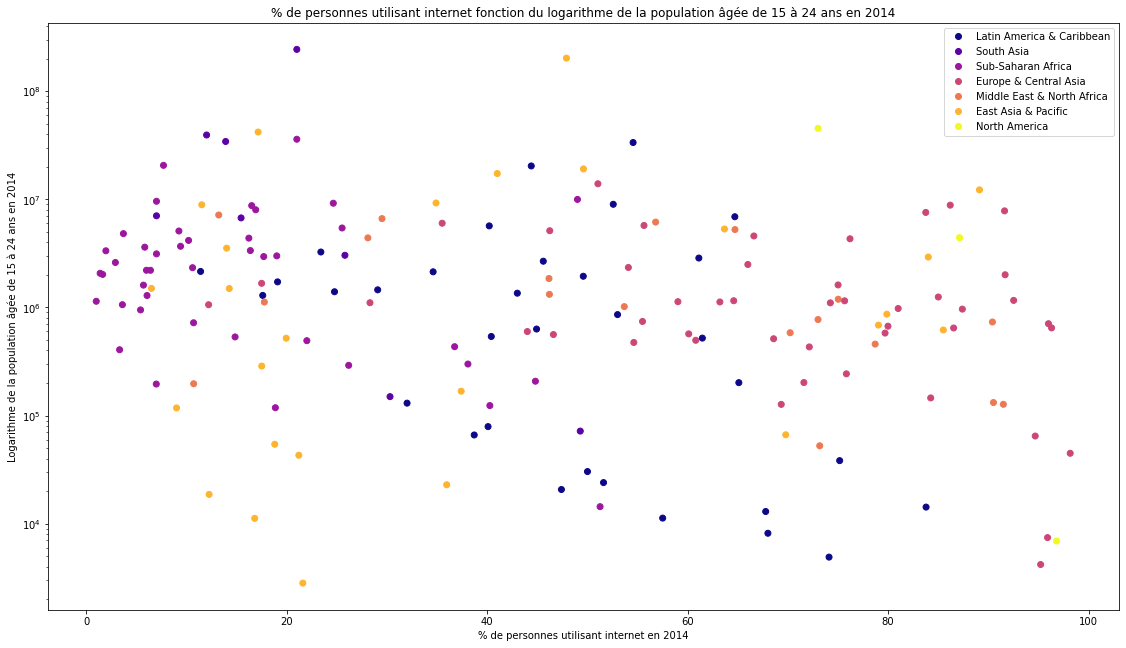

In [108]:
# Graphique qui permet de visualier les pays ayant à la fois le plus d'utilisateurs d'internet pour 100 habitants, 
# et à la fois les pays ayant le plus de population âgée de 15 à 24 ans.

fig,ax = plt.subplots(figsize=(19.20,10.80))
scatter = ax.scatter(x=cibles['% de personnes utilisant internet 2014'], y=cibles['Population âgée de 15 à 24 ans en 2014'], c=cibles['Index_régions'], cmap='plasma')
plt.title('% de personnes utilisant internet fonction du logarithme de la population âgée de 15 à 24 ans en 2014')
plt.xlabel('% de personnes utilisant internet en 2014')
plt.ylabel('Logarithme de la population âgée de 15 à 24 ans en 2014')
plt.yscale("log")
plt.legend(handles=scatter.legend_elements()[0], labels=regions)
nom = str('% de personnes utilisant internet fonction du logarithme de la population âgée de 15 à 24 ans en 2014')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

On peut distinguer que beaucoup de pays de la région Afrique Subsaharienne se situent à gauche du graphique.
La cible est évidemment les pays e situant le plus à droite et le plus en haut du graphique.

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


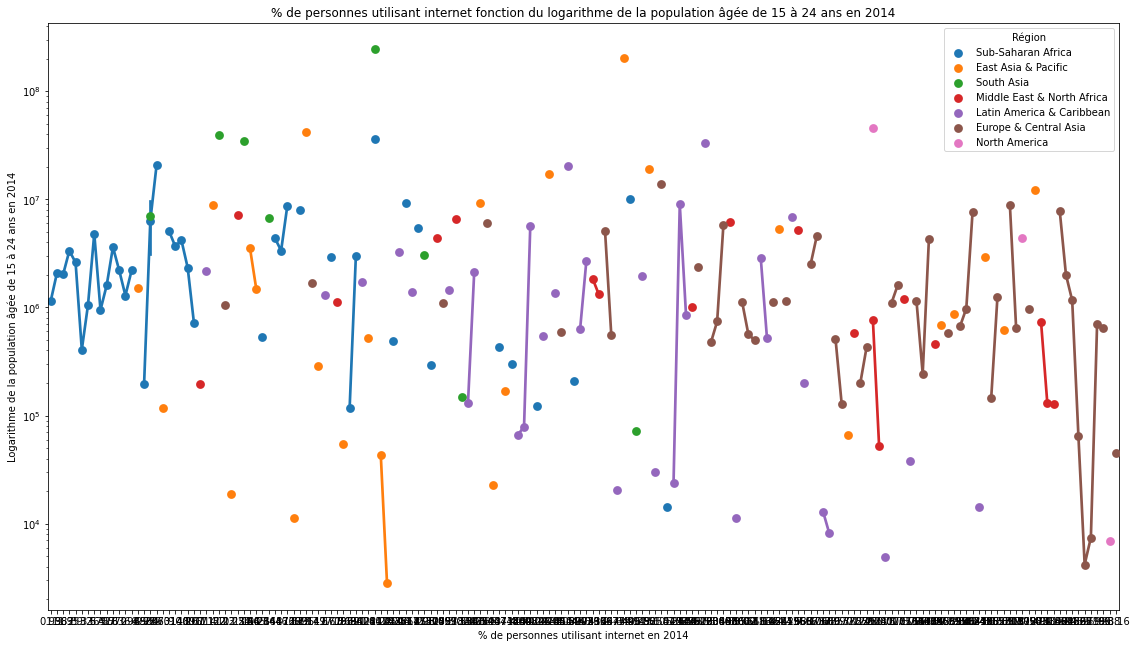

In [109]:
# Autre approche pour le même graphique

plt.figure(figsize=(19.20,10.80))
splot = sns.pointplot('% de personnes utilisant internet 2014', 'Population âgée de 15 à 24 ans en 2014', data=cibles, hue='Région',  cmap='plasma')
splot.set(yscale="log")
plt.title('% de personnes utilisant internet fonction du logarithme de la population âgée de 15 à 24 ans en 2014')
plt.xlabel('% de personnes utilisant internet en 2014')
plt.ylabel('Logarithme de la population âgée de 15 à 24 ans en 2014')
plt.rcParams["xtick.labelsize"] = 2
nom = str('% de personnes utilisant internet fonction du logarithme de la population âgée de 15 à 24 ans en 2014 (v2)')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.draw()

On se rend mieux compte ici que l'Europe et Asie Centrale ont beaucoup de pays intéressants pour notre problématique.

In [110]:
cibles = cibles.assign(Produit = (cibles['% de personnes utilisant internet 2014'] * cibles['Population âgée de 15 à 24 ans en 2014'])/100)

In [111]:
produit = cibles.nlargest(15,'Produit').reset_index()
produit.drop('index', 1, inplace=True)
produit.head()

,Pays,% de personnes utilisant internet 2014,Population âgée de 15 à 24 ans en 2014,Région,Index_régions,Produit
0,China,47.900000,201802535.0,East Asia & Pacific,5,9.666341e+07
1,India,21.000000,243002731.0,South Asia,1,5.103057e+07
2,United States,73.000000,45230846.0,North America,6,3.301852e+07
3,Brazil,54.551002,33469835.0,Latin America & Caribbean,0,1.825813e+07
4,Japan,89.106833,12211081.0,East Asia & Pacific,5,1.088091e+07


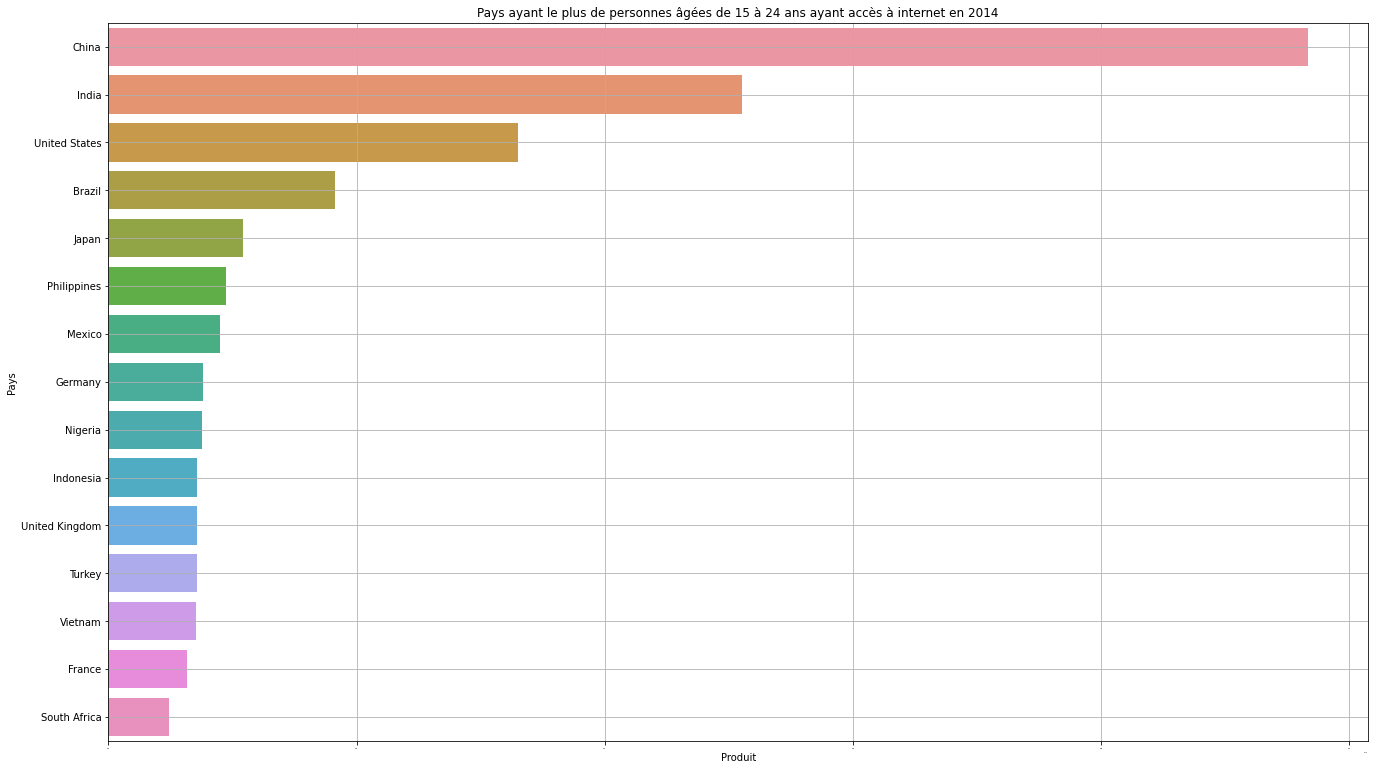

In [112]:
# Classement des pays ayant le plus de personnes âgées de 15 à 24 ans ayant accès à internet en 2014 (estimation)

plt.figure(figsize=(19.20,10.80))
m=15
sns.barplot(x='Produit', y='Pays', data=produit)
plt.title('Pays ayant le plus de personnes âgées de 15 à 24 ans ayant accès à internet en 2014')
plt.grid()
plt.rcParams["xtick.labelsize"] = 15
plt.tight_layout()
nom = str('Pays ayant le plus de personnes âgées de 15 à 24 ans ayant accès à internet en 2014')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

On peut voir ici les 15 pays qui se dégagent en terme de potentiels clients : on a ici une estimation du nombre de personnes âgés de 15 à 24 ans en 2014 ayant accès à internet.
Cependant, certains de ces pays n'ont pas assez de ces personnes ayant suivi des études ; les personnes des pays dont le PIB est trop faible ne pourraient pas se permettre de se financer des cours en ligne.

Il faut donc avoir un aspect sur ces 2 enjeux.
Commençons par les pays avec le plus d'étudiants.

In [113]:
etudes = indicators[:3]

In [114]:
df4[(df4['Indicator Code'] == etudes[0]) & (df4['Année'] == '2014')].nlargest(25,'Valeur')

,Country Name,Region,Indicator Code,Année,Valeur
2421,China,East Asia & Pacific,UIS.E.3,2014,43709224.00
2418,India,South Asia,UIS.E.3,2014,39694604.00
2417,United States,North America,UIS.E.3,2014,11736315.00
2415,Indonesia,East Asia & Pacific,UIS.E.3,2014,9902660.00
2414,Brazil,Latin America & Caribbean,UIS.E.3,2014,9395813.00
2411,Pakistan,South Asia,UIS.E.3,2014,4825847.00
2410,Mexico,Latin America & Caribbean,UIS.E.3,2014,4682336.00
2409,Bangladesh,South Asia,UIS.E.3,2014,4358884.50
2407,United Kingdom,Europe & Central Asia,UIS.E.3,2014,4195081.50
2404,Japan,East Asia & Pacific,UIS.E.3,2014,3850764.50


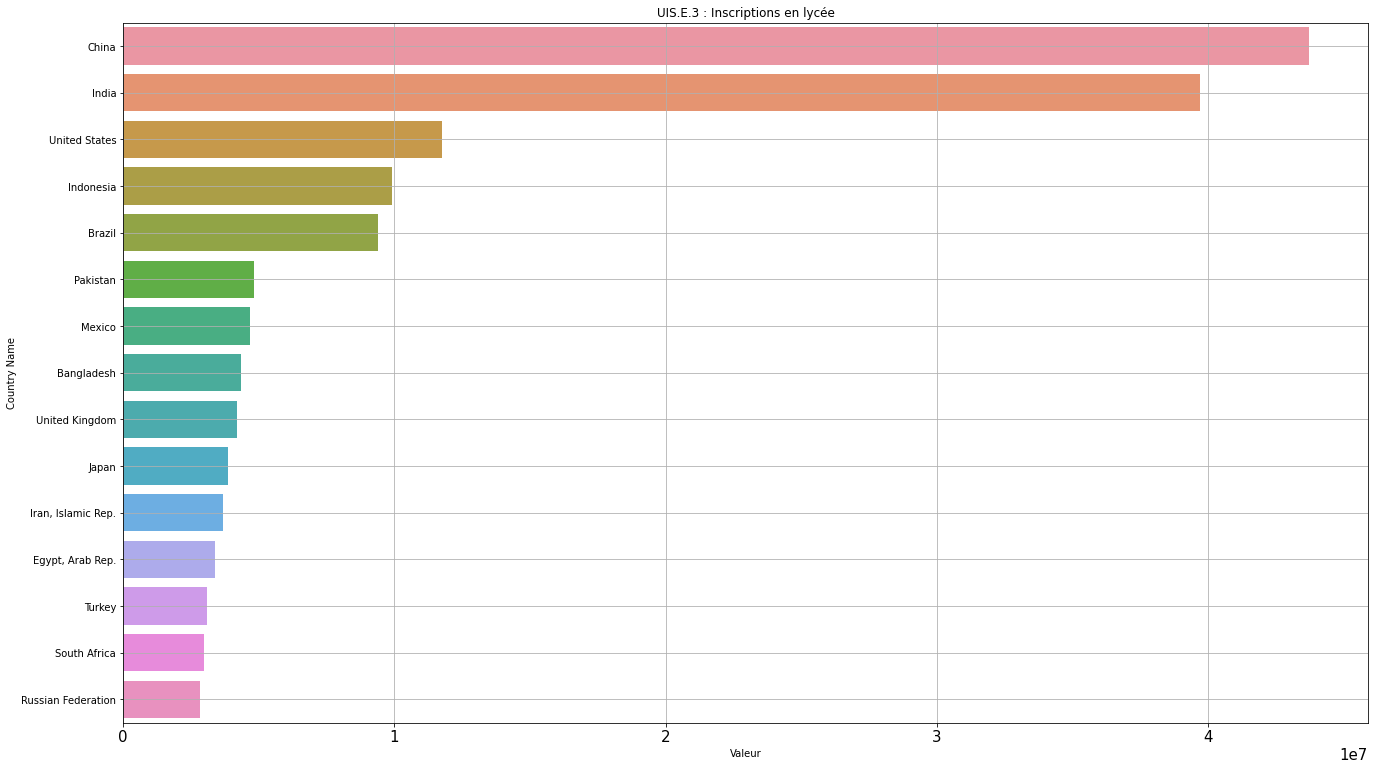

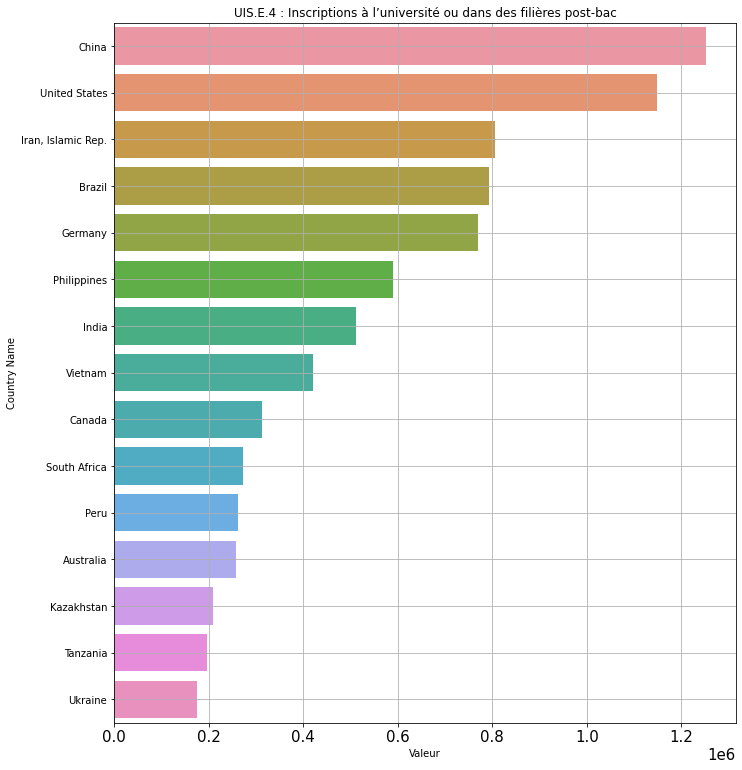

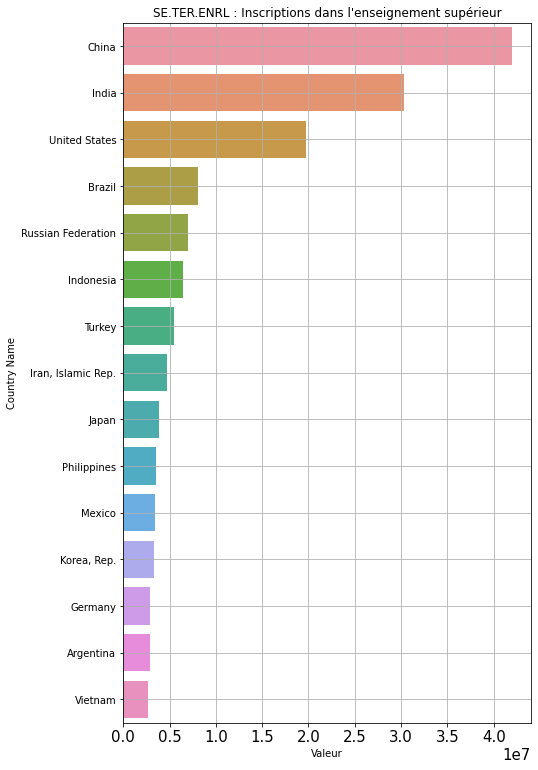

In [115]:
# Classement des pays ayant le plus d'étudiants par catégorie en 2014

m=15
n=len(etudes)

for j in range(1, n+1):
    plt.figure(figsize=(19.20,10.80))
    mydata=df4[(df4['Indicator Code'] == etudes[j-1]) & (df4['Année'] == '2014')].nlargest(m,'Valeur').reset_index()
    plt.subplot(1,j,1)
    sns.barplot(x='Valeur', y='Country Name', data=mydata)
    plt.title(etudes[j-1]+str(' : ')+indicateurs[etudes[j-1]])
    plt.grid()
    plt.tight_layout()
    nom = str(etudes[j-1]+str(' : ')+indicateurs[etudes[j-1]])
    plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()



In [116]:
df6 = df4.copy()
df6.drop('Region', 1, inplace=True)

In [117]:
df6 = df6[(df6['Année'] == '2014') & df6['Indicator Code'].isin(etudes)]
df6.drop(['Indicator Code','Année'],1, inplace=True)


In [118]:
Etudiants = df6.groupby('Country Name').sum()
Etudiants = Etudiants.reset_index()

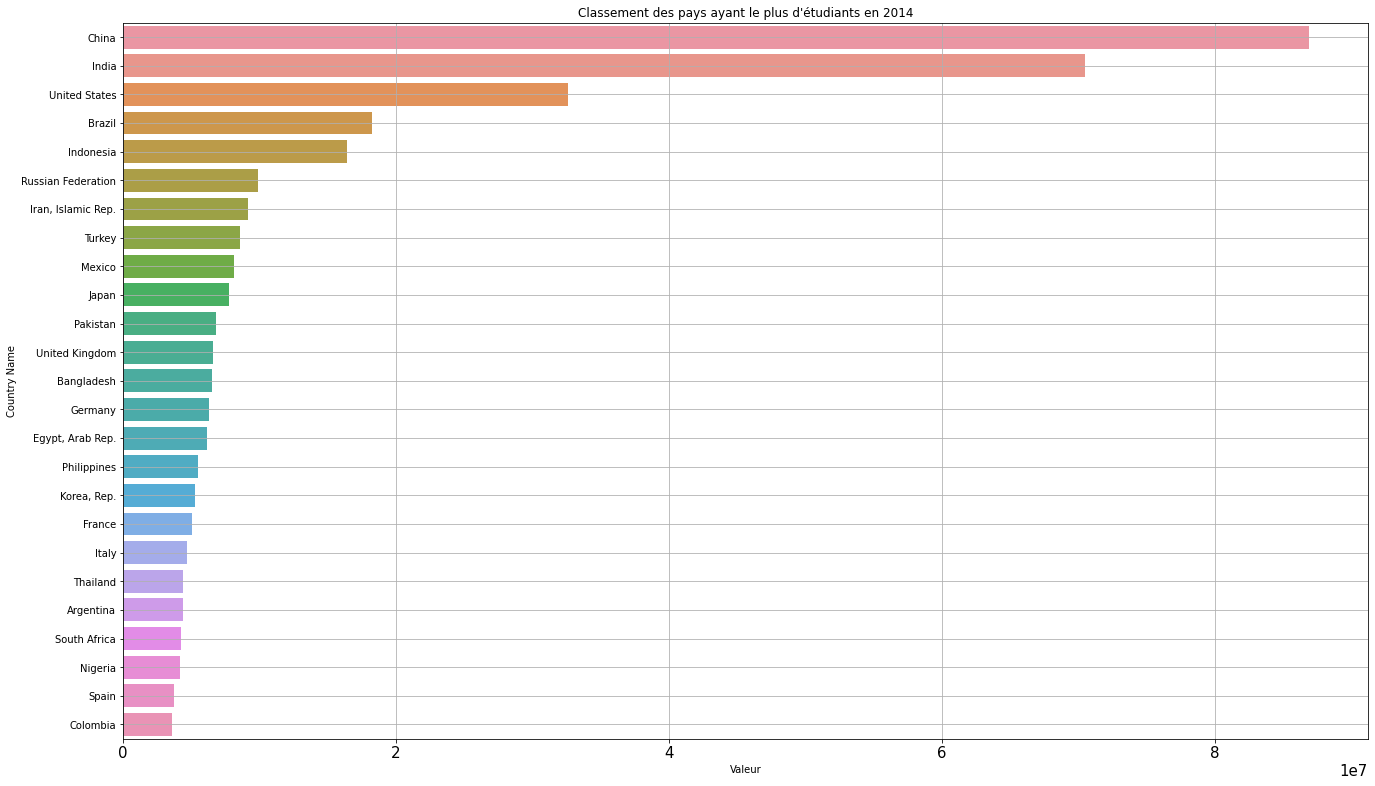

In [119]:
# Classement des pays ayant le plus d'étudiants en 2014

plt.figure(figsize=(19.20,10.80))
m=25
sns.barplot(x='Valeur', y='Country Name', data=Etudiants.nlargest(m,'Valeur'))
plt.grid()
plt.tight_layout()
plt.title('Classement des pays ayant le plus d\'étudiants en 2014')
nom = str('Classement des pays ayant le plus d\'étudiants en 2014')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

On peut comme précédemment coupler ces résultats avec le taux de personnes ayant accès à internet la même année.

In [120]:
Etudiants.columns = ['Pays', 'Nombre total d\'étudiants']
etudiants_internet_2014 = pd.merge(Etudiants, cibles)

In [121]:
etudiants_internet_2014 = etudiants_internet_2014.iloc[:,:3]
etudiants_internet_2014 = etudiants_internet_2014.assign(Produit = (etudiants_internet_2014['% de personnes utilisant internet 2014'] * etudiants_internet_2014['Nombre total d\'étudiants'])/100)
etudiants_internet_2014

,Pays,Nombre total d'étudiants,% de personnes utilisant internet 2014,Produit
0,Afghanistan,1376863.0,7.00000,9.638041e+04
1,Albania,327708.0,60.10000,1.969525e+05
2,Algeria,2368632.5,29.50000,6.987466e+05
3,Andorra,1968.0,95.90000,1.887312e+03
4,Angola,245358.0,10.20000,2.502652e+04
...,...,...,...,...
171,Vanuatu,6065.5,18.80000,1.140314e+03
172,Vietnam,3113829.0,41.00000,1.276670e+06
173,West Bank and Gaza,356588.0,53.67000,1.913808e+05
174,Zambia,56219.5,19.00000,1.068170e+04


In [122]:
etudiants_internet_2014 = etudiants_internet_2014.nlargest(15,'Produit').reset_index()
etudiants_internet_2014.drop('index', 1, inplace=True)
etudiants_internet_2014.head()

,Pays,Nombre total d'étudiants,% de personnes utilisant internet 2014,Produit
0,China,86885938.0,47.900000,4.161836e+07
1,United States,32584101.0,73.000000,2.378639e+07
2,India,70512530.0,21.000000,1.480763e+07
3,Brazil,18260755.0,54.551002,9.961425e+06
4,Japan,7727209.5,89.106833,6.885472e+06


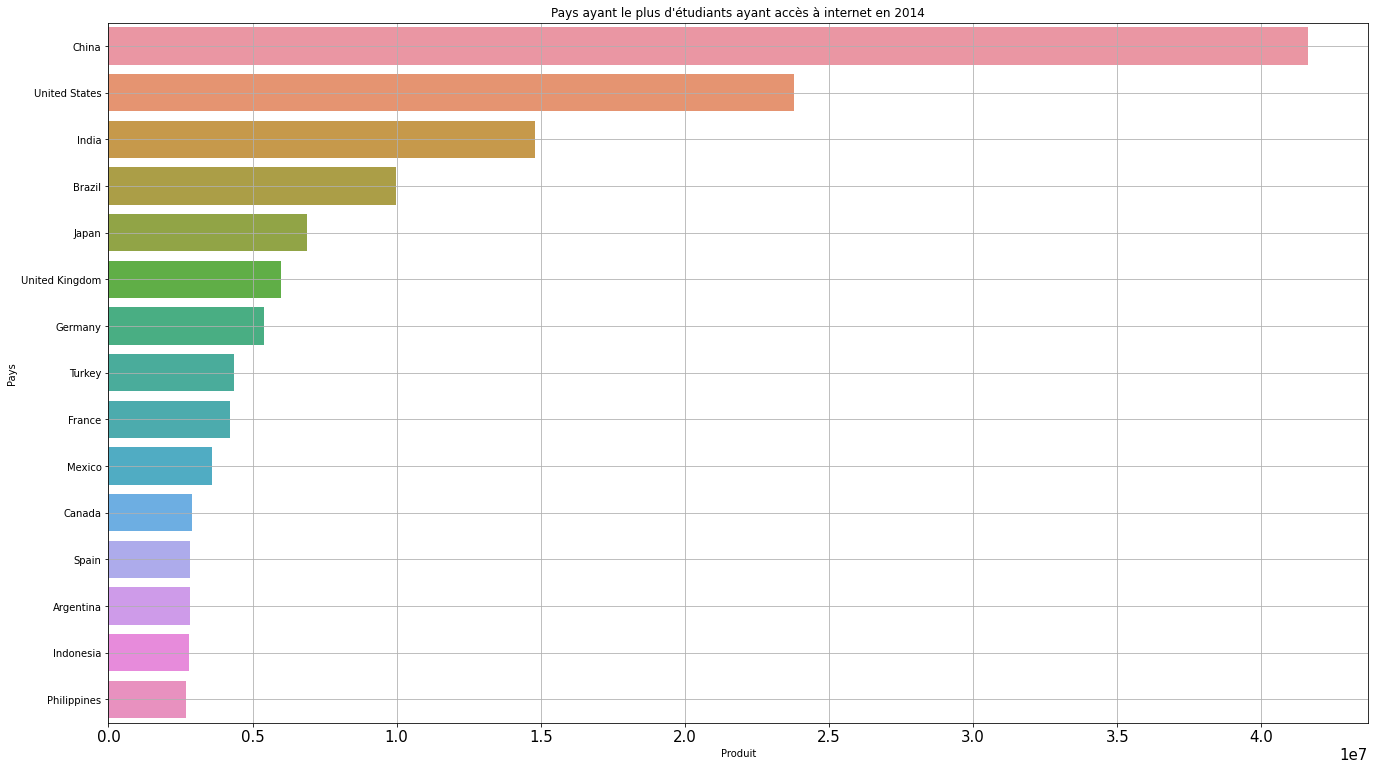

In [123]:
# Classement des pays ayant le plus d'étudiants ayant accès à internet en 2014 (estimation)

plt.figure(figsize=(19.20,10.80))
m=15
sns.barplot(x='Produit', y='Pays', data=etudiants_internet_2014)
plt.title('Pays ayant le plus d\'étudiants ayant accès à internet en 2014')
plt.grid()
plt.tight_layout()
nom = str('Pays ayant le plus d\'étudiants ayant accès à internet en 2014')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

In [124]:
pays_riches = df4[((df4['Année'] == '2014') & (df4['Indicator Code'] == indicators[5]))].nlargest(40,'Valeur').reset_index()

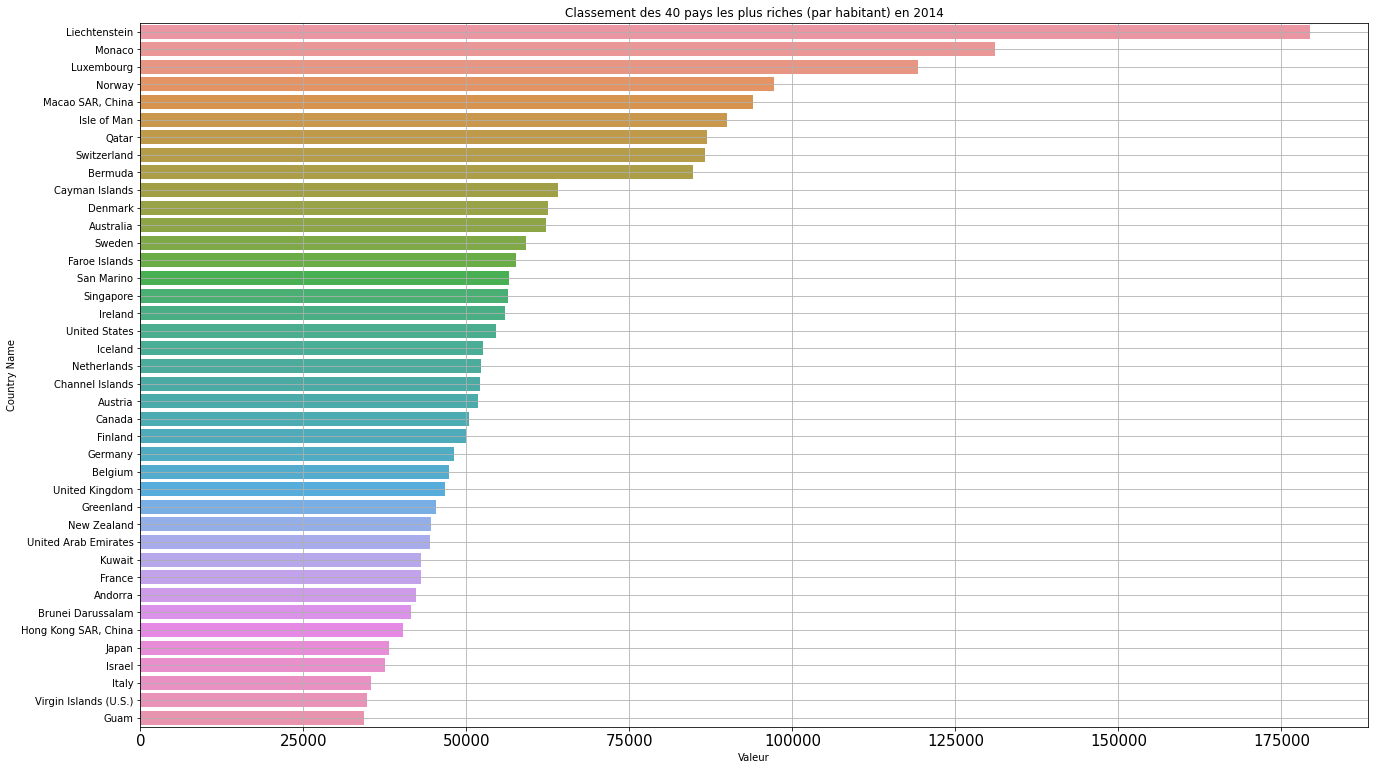

In [125]:
# Classement des 40 pays les plus riches (par habitant) en 2014

plt.figure(figsize=(19.20,10.80))
sns.barplot(x='Valeur', y='Country Name', data=pays_riches)
plt.title('Classement des 40 pays les plus riches (par habitant) en 2014')
plt.grid()
plt.tight_layout()
nom = str('Classement des 40 pays les plus riches (par habitant) en 2014')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

Au lieu de regarder un à un ou deux à deux chaque indicateur, nous allons choisir tous les pays qui ont une valeur supérieure à la médiane de chaque indicateur pour l'année 2014, puis les pondérer par l'indicateur donnant le taux d'accès à internet.

In [126]:
mediane = df4.groupby(['Indicator Code', 'Année']).median().reset_index()
mediane_2014 = mediane[mediane['Année'] == '2014']
mediane_2014 = mediane_2014.reset_index(drop = True)

In [127]:
mediane_2014.drop('Année',1,inplace=True)

In [128]:
# Médiane mondiale de chaque indicateur en 2014

mediane_2014.to_dict('list')

{'Indicator Code': ['IT.NET.USER.P2',
  'NY.GDP.PCAP.CD',
  'SE.TER.ENRL',
  'SP.POP.1524.TO.UN',
  'SP.POP.TOTL',
  'UIS.E.3',
  'UIS.E.4'],
 'Valeur': [46.18,
  6650.06112836686,
  154822.0,
  1157085.5,
  6242648.5,
  165668.75,
  9509.5]}

In [129]:
# Préparation des indicateurs que l'on va comparer à la médiane

a_retirer = ['SP.POP.TOTL', 'IT.NET.USER.P2']
sous_indicateurs = list(set(indicators).difference(set(a_retirer)))
sous_indicateurs

['UIS.E.3', 'NY.GDP.PCAP.CD', 'SP.POP.1524.TO.UN', 'UIS.E.4', 'SE.TER.ENRL']

In [130]:
df7 = df4.copy()
df7 = (df7[df7['Année'] == '2014'])
df7.drop(['Region', 'Année'], 1, inplace=True)

In [131]:
df7 = df7.reset_index(drop = True)
df7 = df7[df7['Indicator Code'].isin(sous_indicateurs)]

In [132]:
# Restriction de nos données sur les sous-indicateurs en 2014

df7 = df7.reset_index(drop = True)
df7 

,Country Name,Indicator Code,Valeur
0,Eritrea,NY.GDP.PCAP.CD,2.926251e+02
1,Burundi,NY.GDP.PCAP.CD,3.127490e+02
2,Malawi,NY.GDP.PCAP.CD,3.547254e+02
3,Central African Republic,NY.GDP.PCAP.CD,3.771320e+02
4,Somalia,NY.GDP.PCAP.CD,4.178900e+02
...,...,...,...
930,Germany,UIS.E.4,7.691695e+05
931,Brazil,UIS.E.4,7.927960e+05
932,"Iran, Islamic Rep.",UIS.E.4,8.048800e+05
933,United States,UIS.E.4,1.147566e+06


In [133]:
#Création de la fonction qui compare chaque indicateur de chaque pays à la médiane de cet indicateur en 2014

def comparaison(dataset):
    pays = []
    for i in range(0, len(dataset)):
        for j in range(0, len(mediane_2014)):
            if (dataset.iloc[i,2] >= mediane_2014['Valeur'][j]) and (dataset.iloc[i,1] == mediane_2014['Indicator Code'][j]):
                pays.append(dataset.iloc[i,0])
    return pays

In [134]:
# Application de la fonction à notre jeu de données et compte des pays qui sont tous au-dessus de la médiane pour tous les indicateurs

lst = comparaison(df7)
print(collections.Counter(lst).most_common(21))

[('Iraq', 5), ('Cuba', 5), ('China', 5), ('Azerbaijan', 5), ('Colombia', 5), ('Romania', 5), ('Brazil', 5), ('Kazakhstan', 5), ('Russian Federation', 5), ('Poland', 5), ('Spain', 5), ('Italy', 5), ('Israel', 5), ('Japan', 5), ('France', 5), ('Belgium', 5), ('Germany', 5), ('Canada', 5), ('United States', 5), ('Sweden', 5), ('Australia', 5)]


In [135]:
# Récupération des pays sous forme de liste
pays = []
for i in range(0, len(collections.Counter(lst).most_common(21))):
    pays.append(collections.Counter(lst).most_common(21)[i][0])

In [136]:
df7[df7['Indicator Code'].isin(sous_indicateurs)]

,Country Name,Indicator Code,Valeur
0,Eritrea,NY.GDP.PCAP.CD,2.926251e+02
1,Burundi,NY.GDP.PCAP.CD,3.127490e+02
2,Malawi,NY.GDP.PCAP.CD,3.547254e+02
3,Central African Republic,NY.GDP.PCAP.CD,3.771320e+02
4,Somalia,NY.GDP.PCAP.CD,4.178900e+02
...,...,...,...
930,Germany,UIS.E.4,7.691695e+05
931,Brazil,UIS.E.4,7.927960e+05
932,"Iran, Islamic Rep.",UIS.E.4,8.048800e+05
933,United States,UIS.E.4,1.147566e+06


In [137]:
dfinal = df4[(df4['Indicator Code'] == indicators[6]) & (df4['Année'] == '2014')].reset_index(drop=True)
dfinal = dfinal[dfinal['Country Name'].isin(pays)]
dfinal = dfinal.sort_values('Valeur', ascending=False).reset_index(drop=True)
dfinal

,Country Name,Region,Indicator Code,Année,Valeur
0,Sweden,Europe & Central Asia,IT.NET.USER.P2,2014,92.520000
1,Japan,East Asia & Pacific,IT.NET.USER.P2,2014,89.106833
2,Canada,North America,IT.NET.USER.P2,2014,87.120000
3,Germany,Europe & Central Asia,IT.NET.USER.P2,2014,86.190000
4,Belgium,Europe & Central Asia,IT.NET.USER.P2,2014,85.000000
5,Australia,East Asia & Pacific,IT.NET.USER.P2,2014,84.000000
6,France,Europe & Central Asia,IT.NET.USER.P2,2014,83.750000
7,Spain,Europe & Central Asia,IT.NET.USER.P2,2014,76.190000
8,Israel,Middle East & North Africa,IT.NET.USER.P2,2014,75.017753
9,Azerbaijan,Europe & Central Asia,IT.NET.USER.P2,2014,75.000016


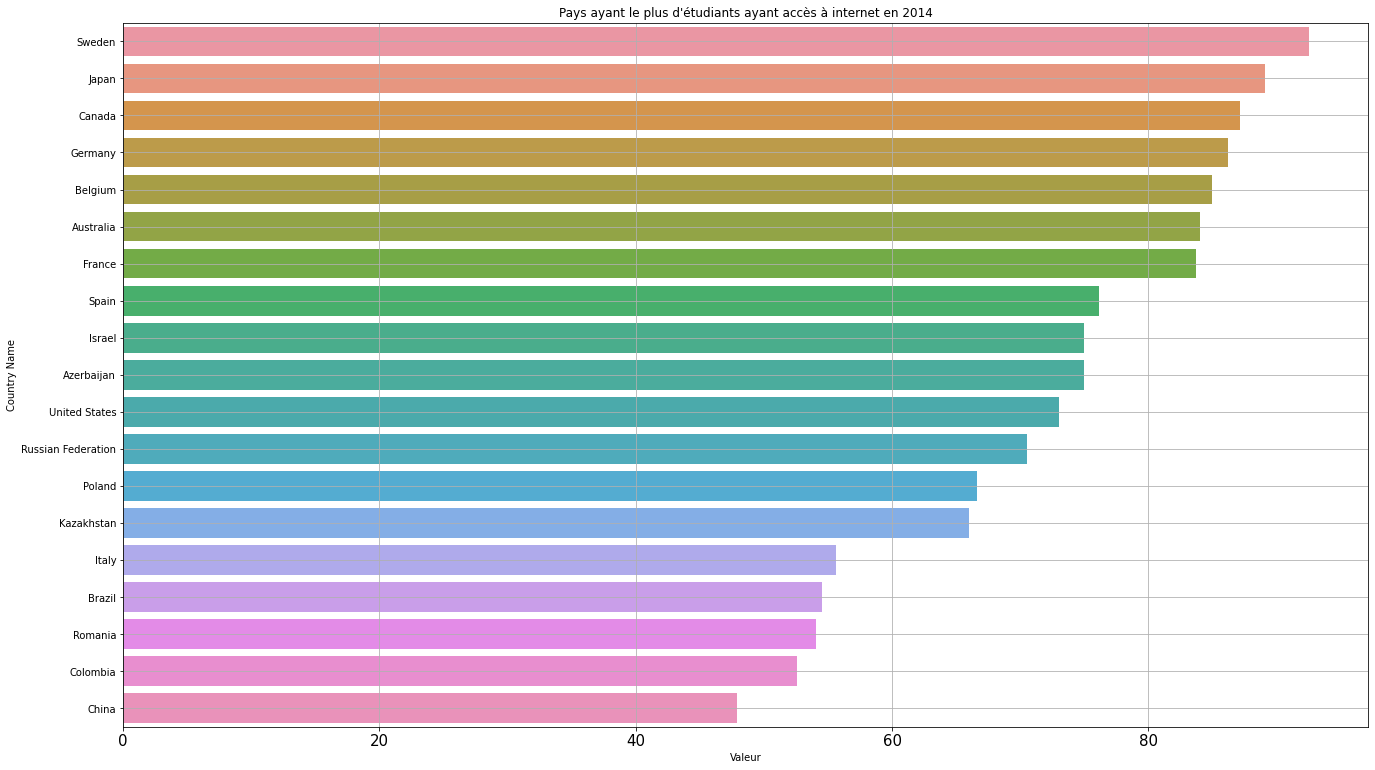

In [138]:
# Classement des pays répondant le plus aux critères et ayant le plus accès à internet en 2014

plt.figure(figsize=(19.20,10.80))
sns.barplot(x='Valeur', y='Country Name', data=dfinal.iloc[:19,:])
plt.title('Pays ayant le plus d\'étudiants ayant accès à internet en 2014')
plt.grid()
plt.tight_layout()
nom = str('Pays ayant le plus d\'étudiants ayant accès à internet en 2014')
plt.savefig(os.path.join('Documents\OpenClassrooms\Projet 2\P2_mohamed_mosbahi', nom +'.png'))
plt.show()

Voici les pays où il est le plus intéressant d'investir pour répondre à la problématique.